In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
pd.set_option('display.max_rows', 4000000)
%matplotlib inline
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn import metrics
from mlxtend.preprocessing import standardize
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats
import os
os.chdir(r"C:\Users\asady\OneDrive - polymtl.ca\Code")
from sktime.transformations.series.boxcox import BoxCoxTransformer

In [2]:
data = pd.read_csv('D:/Resource/Data/CSV/Weather091521.csv', parse_dates=True)
'''
del data['Latitude (y)']
del data['Longitude (x)']
del data['Year']
del data['Month']
del data['Day']
'''
data = data.set_index('Date/Time')
data.shape
data

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
Date/Time                                                                      
2020-01-01            1.3           -0.9             0.2                17.8   
2020-01-02            4.0           -1.4             1.3                16.7   
2020-01-03            5.2            1.3             3.2                14.8   
2020-01-04            1.9           -2.0            -0.1                18.1   
2020-01-05           -1.8          -11.7            -6.7                24.7   
2020-01-06           -4.7          -12.2            -8.5                26.5   
2020-01-07           -2.0           -8.3            -5.1                23.1   
2020-01-08           -0.1          -11.3            -5.7                23.7   
2020-01-09           -7.9          -16.2           -12.0                30.0   
2020-01-10            3.2          -10.1            -3.5                21.5   
2020-01-11            6.6           -3.7             1.4                16.6   
2020-01-12           -3.6           -9.4            -6.5                24.5   
2020-01-13           -7.1          -10.0            -8.6                26.6   
2020-01-14           -5.5           -7.3            -6.4                24.4   
2020-01-15            0.8           -6.8            -3.0                21.0   
2020-01-16           -0.5          -13.7            -7.1                25.1   
2020-01-17          -13.6          -19.9           -16.8                34.8   
2020-01-18          -13.1          -17.9           -15.5                33.5   
2020-01-19           -8.3          -16.7           -12.5                30.5   
2020-01-20          -11.1          -19.0           -15.0                33.0   
2020-01-21           -3.0          -18.5           -10.7                28.7   
2020-01-22            1.6           -6.4            -2.4                20.4   
2020-01-23            2.0           -5.9            -1.9                19.9   
2020-01-24            1.3           -3.1            -0.9                18.9   
2020-01-25            1.3           -4.0            -1.3                19.3   
2020-01-26            2.2            0.4             1.3                16.7   
2020-01-27            2.5            0.0             1.2                16.8   
2020-01-28            0.3           -8.4            -4.1                22.1   
2020-01-29           -5.5          -12.9            -9.2                27.2   
2020-01-30           -4.7          -14.4            -9.6                27.6   
2020-01-31           -3.0          -14.0            -8.5                26.5   
2020-02-01           -2.0           -9.7            -5.8                23.8   
2020-02-02           -1.5          -11.1            -6.3                24.3   
2020-02-03            3.6           -3.6             0.0                18.0   
2020-02-04            2.8           -2.0             0.4                17.6   
2020-02-05           -1.7           -9.1            -5.4                23.4   
2020-02-06           -5.0           -8.8            -6.9                24.9   
2020-02-07           -5.0          -12.5            -8.7                26.7   
2020-02-08          -12.5          -19.9           -16.2                34.2   
2020-02-09           -6.3          -23.7           -15.0                33.0   
2020-02-10           -1.7          -10.5            -6.1                24.1   
2020-02-11           -0.8          -11.9            -6.4                24.4   
2020-02-12            1.6           -2.9            -0.7                18.7   
2020-02-13            0.1          -14.8            -7.4                25.4   
2020-02-14          -14.8          -24.1           -19.5                37.5   
2020-02-15           -2.1          -18.1           -10.1                28.1   
2020-02-16            2.8           -4.1            -0.7                18.7   
2020-02-17           -2.0          -13.1            -7.6                25.6   
2020-02-18  

In [30]:
'''
data['Total Precip (mm)'] = data['Total Precip (mm)'].fillna((data['Total Precip (mm)'].mode()))
data ['Dir of Max Gust (10s deg)'] =data['Dir of Max Gust (10s deg)'].fillna(data['Dir of Max Gust (10s deg)'].mode())
data ['Snow on Grnd (cm)'] = data['Snow on Grnd (cm)'].fillna(0)
data = data[data['Max Temp (°C)'].notna()]
del data['Dir of Max Gust (10s deg)']
del data['Spd of Max Gust (km/h)']
'''

(363, 7)

In [31]:
#data = data.dropna(axis=0, subset=['Total Precip (mm)'])
#data.isna().sum()

In [33]:
data

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
Date/Time                                                                      
2020-01-01            1.3           -0.9             0.2                17.8   
2020-01-02            4.0           -1.4             1.3                16.7   
2020-01-03            5.2            1.3             3.2                14.8   
2020-01-04            1.9           -2.0            -0.1                18.1   
2020-01-05           -1.8          -11.7            -6.7                24.7   
2020-01-06           -4.7          -12.2            -8.5                26.5   
2020-01-07           -2.0           -8.3            -5.1                23.1   
2020-01-08           -0.1          -11.3            -5.7                23.7   
2020-01-09           -7.9          -16.2           -12.0                30.0   
2020-01-10            3.2          -10.1            -3.5                21.5   
2020-01-11            6.6           -3.7             1.4                16.6   
2020-01-12           -3.6           -9.4            -6.5                24.5   
2020-01-13           -7.1          -10.0            -8.6                26.6   
2020-01-14           -5.5           -7.3            -6.4                24.4   
2020-01-15            0.8           -6.8            -3.0                21.0   
2020-01-16           -0.5          -13.7            -7.1                25.1   
2020-01-17          -13.6          -19.9           -16.8                34.8   
2020-01-18          -13.1          -17.9           -15.5                33.5   
2020-01-19           -8.3          -16.7           -12.5                30.5   
2020-01-20          -11.1          -19.0           -15.0                33.0   
2020-01-21           -3.0          -18.5           -10.7                28.7   
2020-01-22            1.6           -6.4            -2.4                20.4   
2020-01-23            2.0           -5.9            -1.9                19.9   
2020-01-24            1.3           -3.1            -0.9                18.9   
2020-01-25            1.3           -4.0            -1.3                19.3   
2020-01-26            2.2            0.4             1.3                16.7   
2020-01-27            2.5            0.0             1.2                16.8   
2020-01-28            0.3           -8.4            -4.1                22.1   
2020-01-29           -5.5          -12.9            -9.2                27.2   
2020-01-30           -4.7          -14.4            -9.6                27.6   
2020-01-31           -3.0          -14.0            -8.5                26.5   
2020-02-01           -2.0           -9.7            -5.8                23.8   
2020-02-02           -1.5          -11.1            -6.3                24.3   
2020-02-03            3.6           -3.6             0.0                18.0   
2020-02-04            2.8           -2.0             0.4                17.6   
2020-02-05           -1.7           -9.1            -5.4                23.4   
2020-02-06           -5.0           -8.8            -6.9                24.9   
2020-02-07           -5.0          -12.5            -8.7                26.7   
2020-02-08          -12.5          -19.9           -16.2                34.2   
2020-02-09           -6.3          -23.7           -15.0                33.0   
2020-02-10           -1.7          -10.5            -6.1                24.1   
2020-02-11           -0.8          -11.9            -6.4                24.4   
2020-02-12            1.6           -2.9            -0.7                18.7   
2020-02-13            0.1          -14.8            -7.4                25.4   
2020-02-14          -14.8          -24.1           -19.5                37.5   
2020-02-15           -2.1          -18.1           -10.1                28.1   
2020-02-16            2.8           -4.1            -0.7                18.7   
2020-02-17           -2.0          -13.1            -7.6                25.6   
2020-02-18  

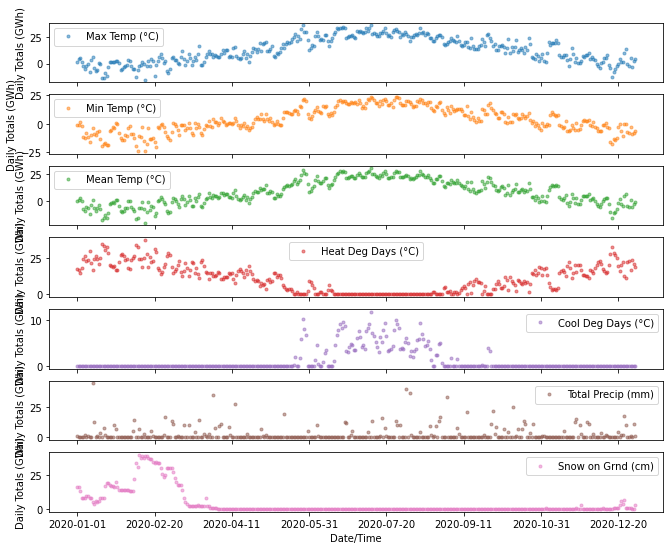

In [65]:
cols_plot = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Precip (mm)', 'Snow on Grnd (cm)']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

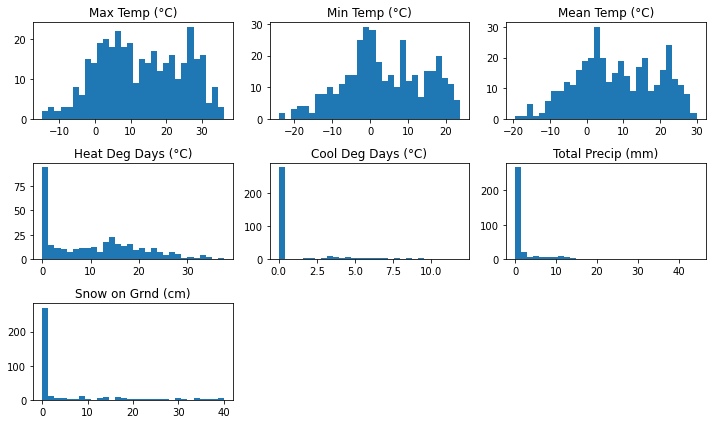

In [44]:
data.hist(layout = (3,3), grid=False,
       figsize=(10, 6),
       bins=30)
plt.tight_layout()


Initialization complete
Iteration 0, inertia 224515.7700000001.
Iteration 1, inertia 214164.00671270737.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 141940.05000000022
Iteration 1, inertia 98633.08160124939
Iteration 2, inertia 91001.61962187657
Iteration 3, inertia 89014.48021850259
Iteration 4, inertia 88273.84191447937
Iteration 5, inertia 88114.35053993588
Iteration 6, inertia 88094.21846969902
Iteration 7, inertia 88089.96694587
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 75713.70000000003
Iteration 1, inertia 59459.44152936171
Iteration 2, inertia 57920.10269367258
Iteration 3, inertia 57606.24837086506
Iteration 4, inertia 57544.03897378453
Iteration 5, inertia 57539.34281345105
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 57612.95000000004
Iteration 1, inertia 45559.365642572215
Iteration 2, inertia 45404.60752642107
Iteration 3, inertia 45

C:\Users\asady\.conda\envs\Gower\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


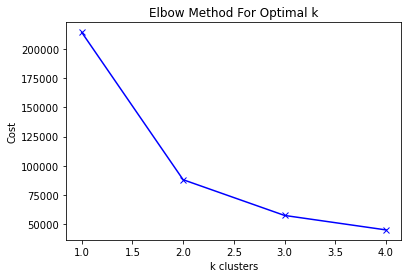

In [51]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    model = KMeans(n_clusters=num_clusters, init = 'k-means++', n_init = 1, verbose=1)
    model.fit_predict(df)
    cost.append(model.inertia_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [52]:
#km = TimeSeriesKMeans(n_clusters=2, metric="dtw")

#labels = km.fit_predict(data)

C:\Users\asady\.conda\envs\Gower\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

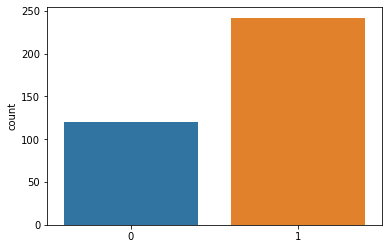

In [57]:
sns.countplot(labels)

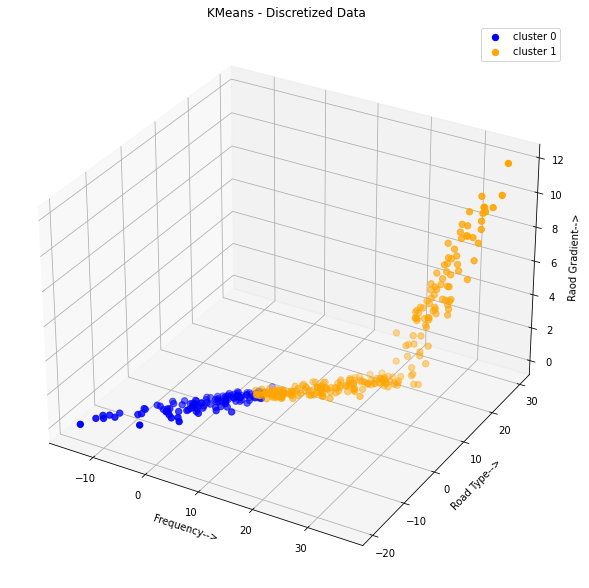

In [58]:
fig = plt.figure(figsize = (10,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[labels == 0,0],data.iloc[labels == 0,2],data.iloc[labels == 0,4], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(data.iloc[labels == 1,0],data.iloc[labels == 1,2],data.iloc[labels == 1,4], s = 40 , color = 'orange', label = "cluster 1")
ax.set_xlabel('Frequency-->')
ax.set_ylabel('Road Type-->')
ax.set_zlabel('Raod Gradient-->')
ax.legend()
ax.set_title("KMeans - Discretized Data")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5012725292000676
For n_clusters = 3 The average silhouette_score is : 0.449405264531973
For n_clusters = 4 The average silhouette_score is : 0.39533796106496844
For n_clusters = 5 The average silhouette_score is : 0.39358585212272057
For n_clusters = 6 The average silhouette_score is : 0.4124365295258438
For n_clusters = 7 The average silhouette_score is : 0.4318505476805405
For n_clusters = 8 The average silhouette_score is : 0.3956431540891291
For n_clusters = 9 The average silhouette_score is : 0.398929273145666
For n_clusters = 10 The average silhouette_score is : 0.39510930806069755


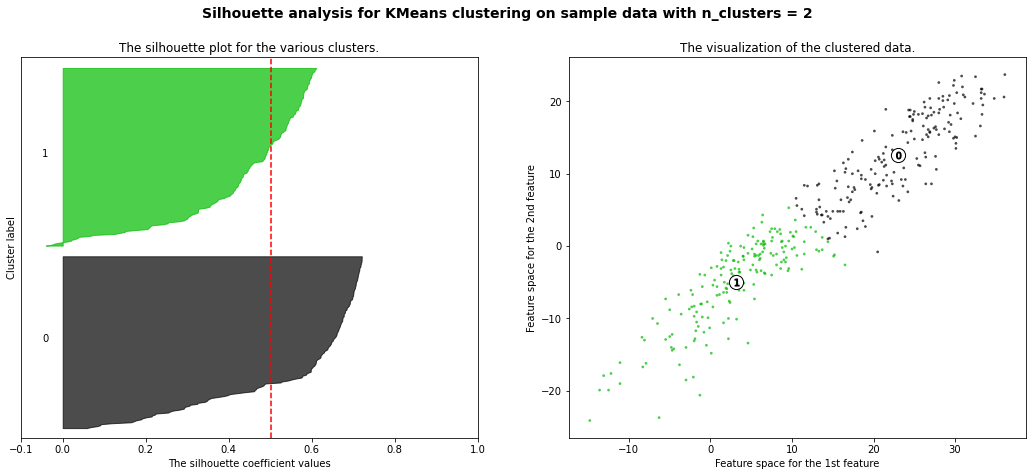

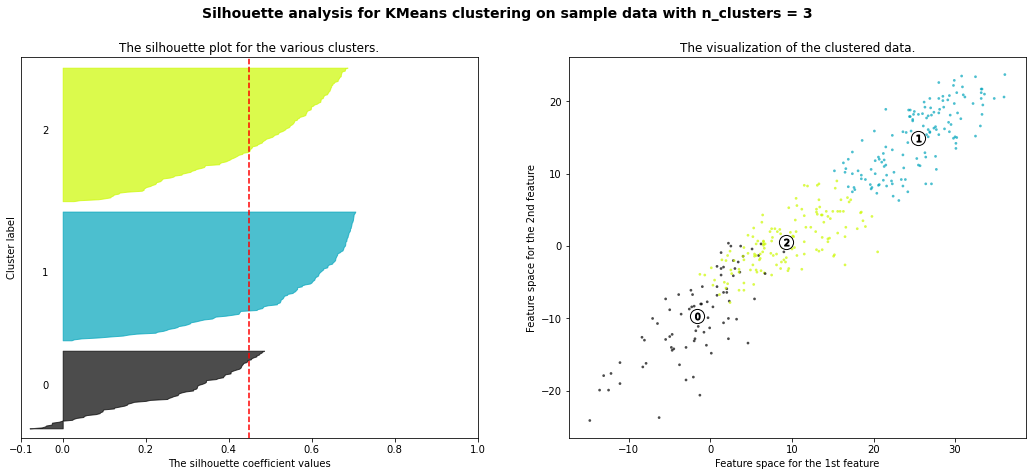

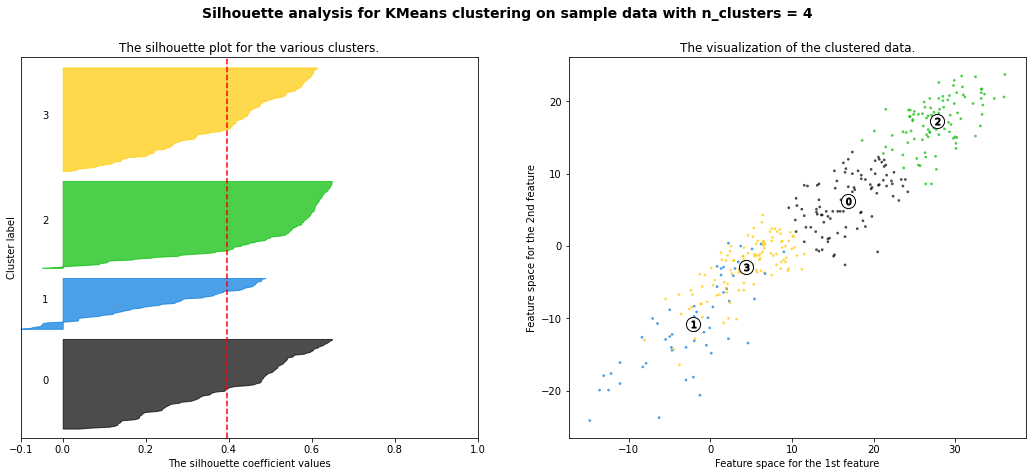

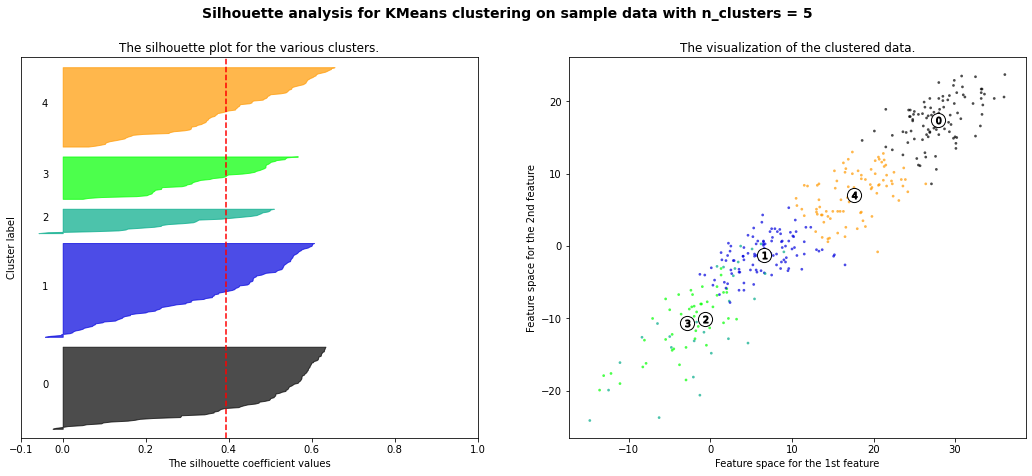

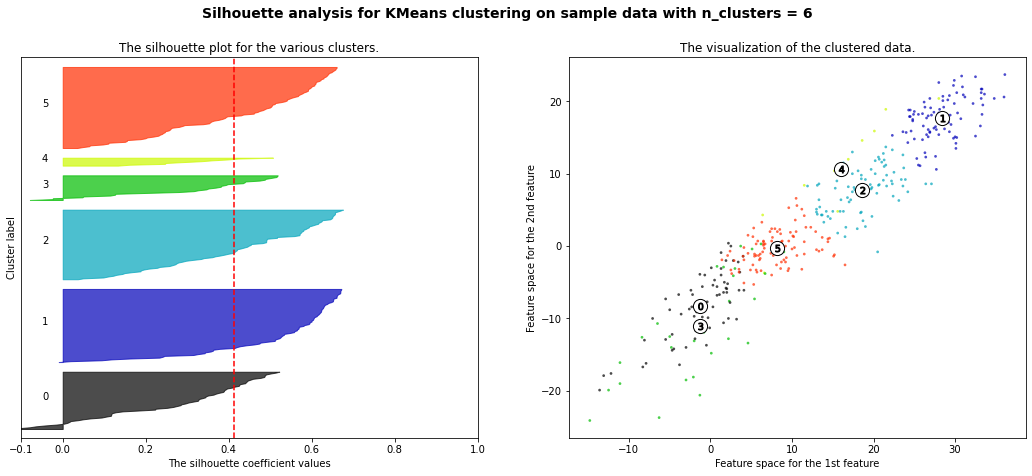

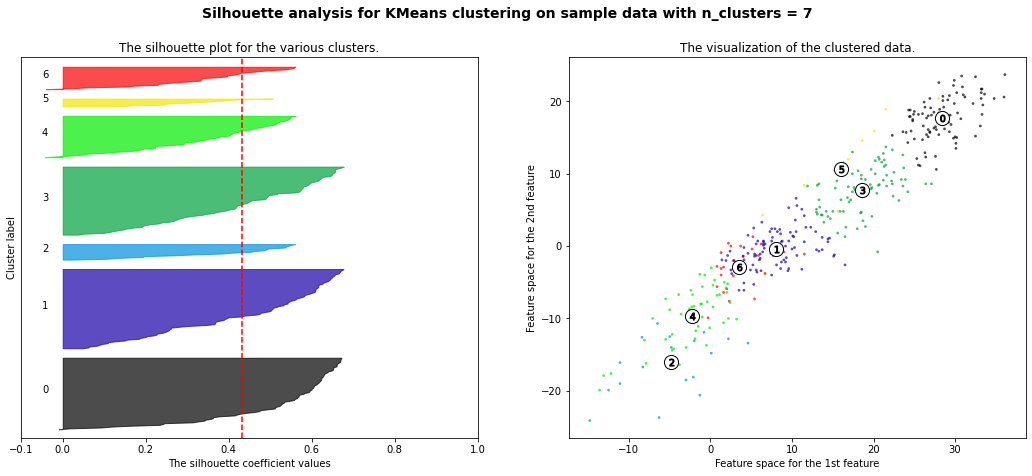

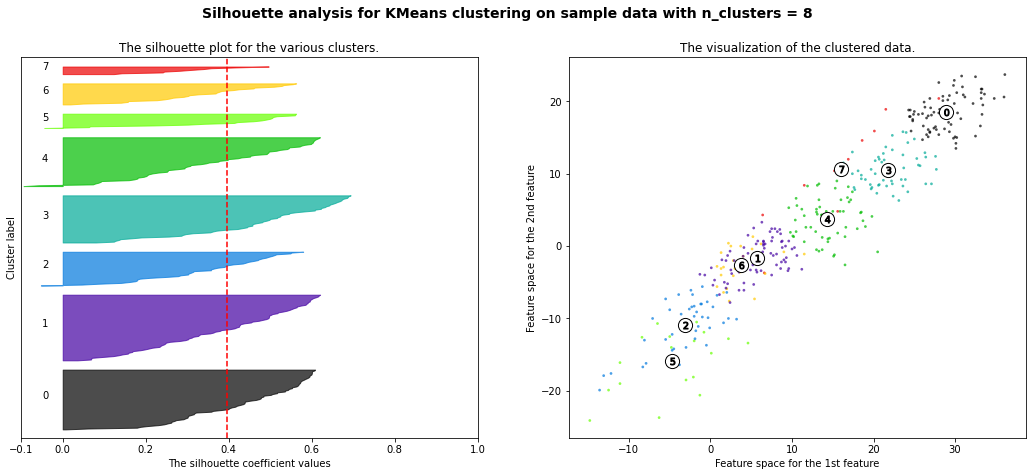

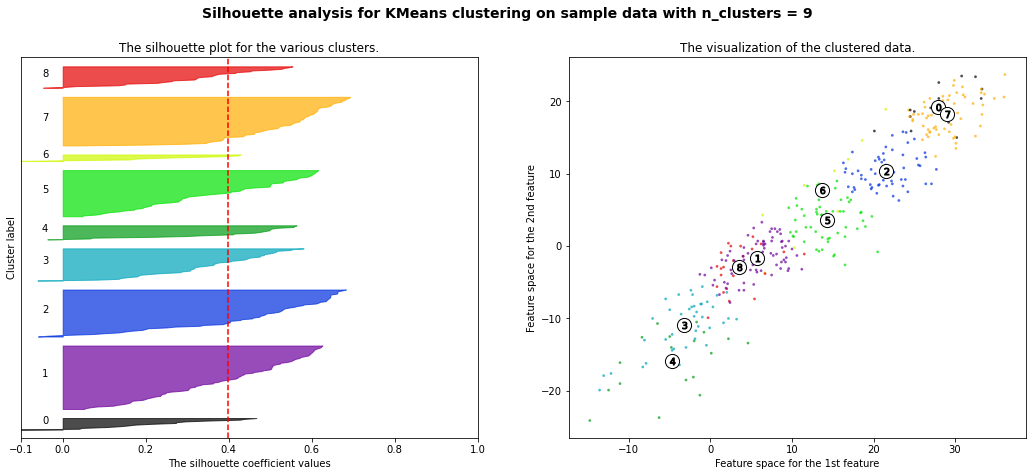

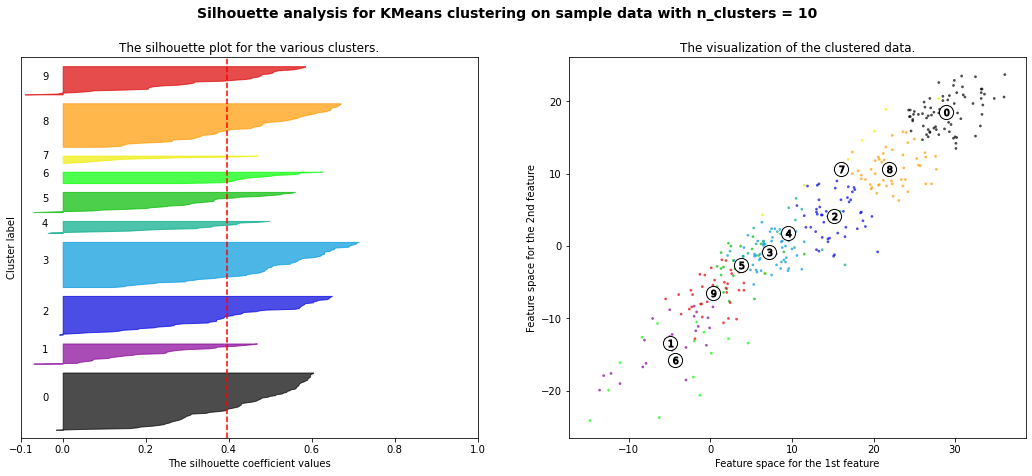

In [63]:
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data.iloc[:, 0], data.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [21]:
################################### Processed data + KMeans #############################################################

In [59]:
df = pd.read_csv('D:/Resource/Data/CSV/Weather091521.csv', parse_dates=True)
df.set_index('Date/Time', inplace = True)
df

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
Date/Time                                                                      
2020-01-01            1.3           -0.9             0.2                17.8   
2020-01-02            4.0           -1.4             1.3                16.7   
2020-01-03            5.2            1.3             3.2                14.8   
2020-01-04            1.9           -2.0            -0.1                18.1   
2020-01-05           -1.8          -11.7            -6.7                24.7   
2020-01-06           -4.7          -12.2            -8.5                26.5   
2020-01-07           -2.0           -8.3            -5.1                23.1   
2020-01-08           -0.1          -11.3            -5.7                23.7   
2020-01-09           -7.9          -16.2           -12.0                30.0   
2020-01-10            3.2          -10.1            -3.5                21.5   
2020-01-11            6.6           -3.7             1.4                16.6   
2020-01-12           -3.6           -9.4            -6.5                24.5   
2020-01-13           -7.1          -10.0            -8.6                26.6   
2020-01-14           -5.5           -7.3            -6.4                24.4   
2020-01-15            0.8           -6.8            -3.0                21.0   
2020-01-16           -0.5          -13.7            -7.1                25.1   
2020-01-17          -13.6          -19.9           -16.8                34.8   
2020-01-18          -13.1          -17.9           -15.5                33.5   
2020-01-19           -8.3          -16.7           -12.5                30.5   
2020-01-20          -11.1          -19.0           -15.0                33.0   
2020-01-21           -3.0          -18.5           -10.7                28.7   
2020-01-22            1.6           -6.4            -2.4                20.4   
2020-01-23            2.0           -5.9            -1.9                19.9   
2020-01-24            1.3           -3.1            -0.9                18.9   
2020-01-25            1.3           -4.0            -1.3                19.3   
2020-01-26            2.2            0.4             1.3                16.7   
2020-01-27            2.5            0.0             1.2                16.8   
2020-01-28            0.3           -8.4            -4.1                22.1   
2020-01-29           -5.5          -12.9            -9.2                27.2   
2020-01-30           -4.7          -14.4            -9.6                27.6   
2020-01-31           -3.0          -14.0            -8.5                26.5   
2020-02-01           -2.0           -9.7            -5.8                23.8   
2020-02-02           -1.5          -11.1            -6.3                24.3   
2020-02-03            3.6           -3.6             0.0                18.0   
2020-02-04            2.8           -2.0             0.4                17.6   
2020-02-05           -1.7           -9.1            -5.4                23.4   
2020-02-06           -5.0           -8.8            -6.9                24.9   
2020-02-07           -5.0          -12.5            -8.7                26.7   
2020-02-08          -12.5          -19.9           -16.2                34.2   
2020-02-09           -6.3          -23.7           -15.0                33.0   
2020-02-10           -1.7          -10.5            -6.1                24.1   
2020-02-11           -0.8          -11.9            -6.4                24.4   
2020-02-12            1.6           -2.9            -0.7                18.7   
2020-02-13            0.1          -14.8            -7.4                25.4   
2020-02-14          -14.8          -24.1           -19.5                37.5   
2020-02-15           -2.1          -18.1           -10.1                28.1   
2020-02-16            2.8           -4.1            -0.7                18.7   
2020-02-17           -2.0          -13.1            -7.6                25.6   
2020-02-18  

<AxesSubplot:>

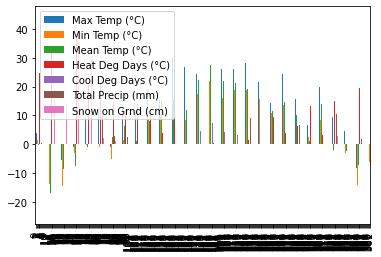

In [70]:
df.plot(kind = 'bar')

In [ ]:
#km = TimeSeriesKMeans(n_clusters=2, metric="dtw")
#labels = km.fit_predict(X)

In [ ]:
'''
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()
'''

In [18]:
def plotColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'b')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

C:\Users\asady\AppData\Local\Temp/ipykernel_22940/1871663497.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


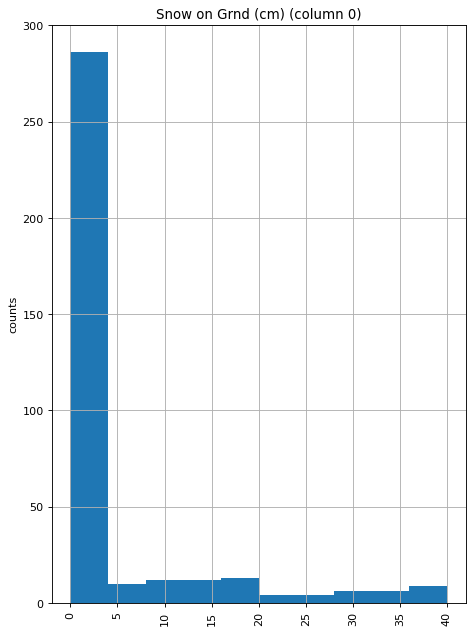

In [26]:
plotColumnDistribution(df, 1, 1)

In [33]:
'''
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    #plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
plotCorrelationMatrix(df, 20)
'''

"\ndef plotCorrelationMatrix(df, graphWidth):\n    #filename = df.dataframeName\n    df = df.dropna('columns') # drop columns with NaN\n    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values\n    if df.shape[1] < 2:\n        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')\n        return\n    corr = df.corr()\n    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')\n    corrMat = plt.matshow(corr, fignum = 1)\n    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)\n    plt.yticks(range(len(corr.columns)), corr.columns)\n    plt.gca().xaxis.tick_bottom()\n    plt.colorbar(corrMat)\n    #plt.title(f'Correlation Matrix for {filename}', fontsize=15)\n    plt.show()\nplotCorrelationMatrix(df, 20)\n"

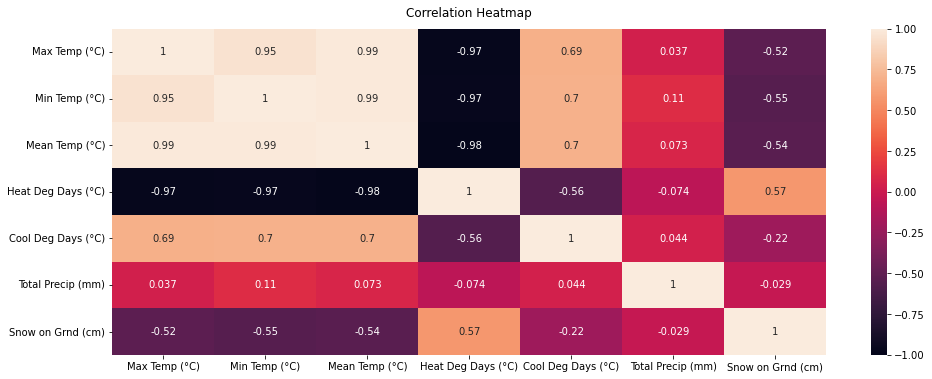

In [34]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

C:\Users\asady\AppData\Local\Temp/ipykernel_22940/1691194594.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


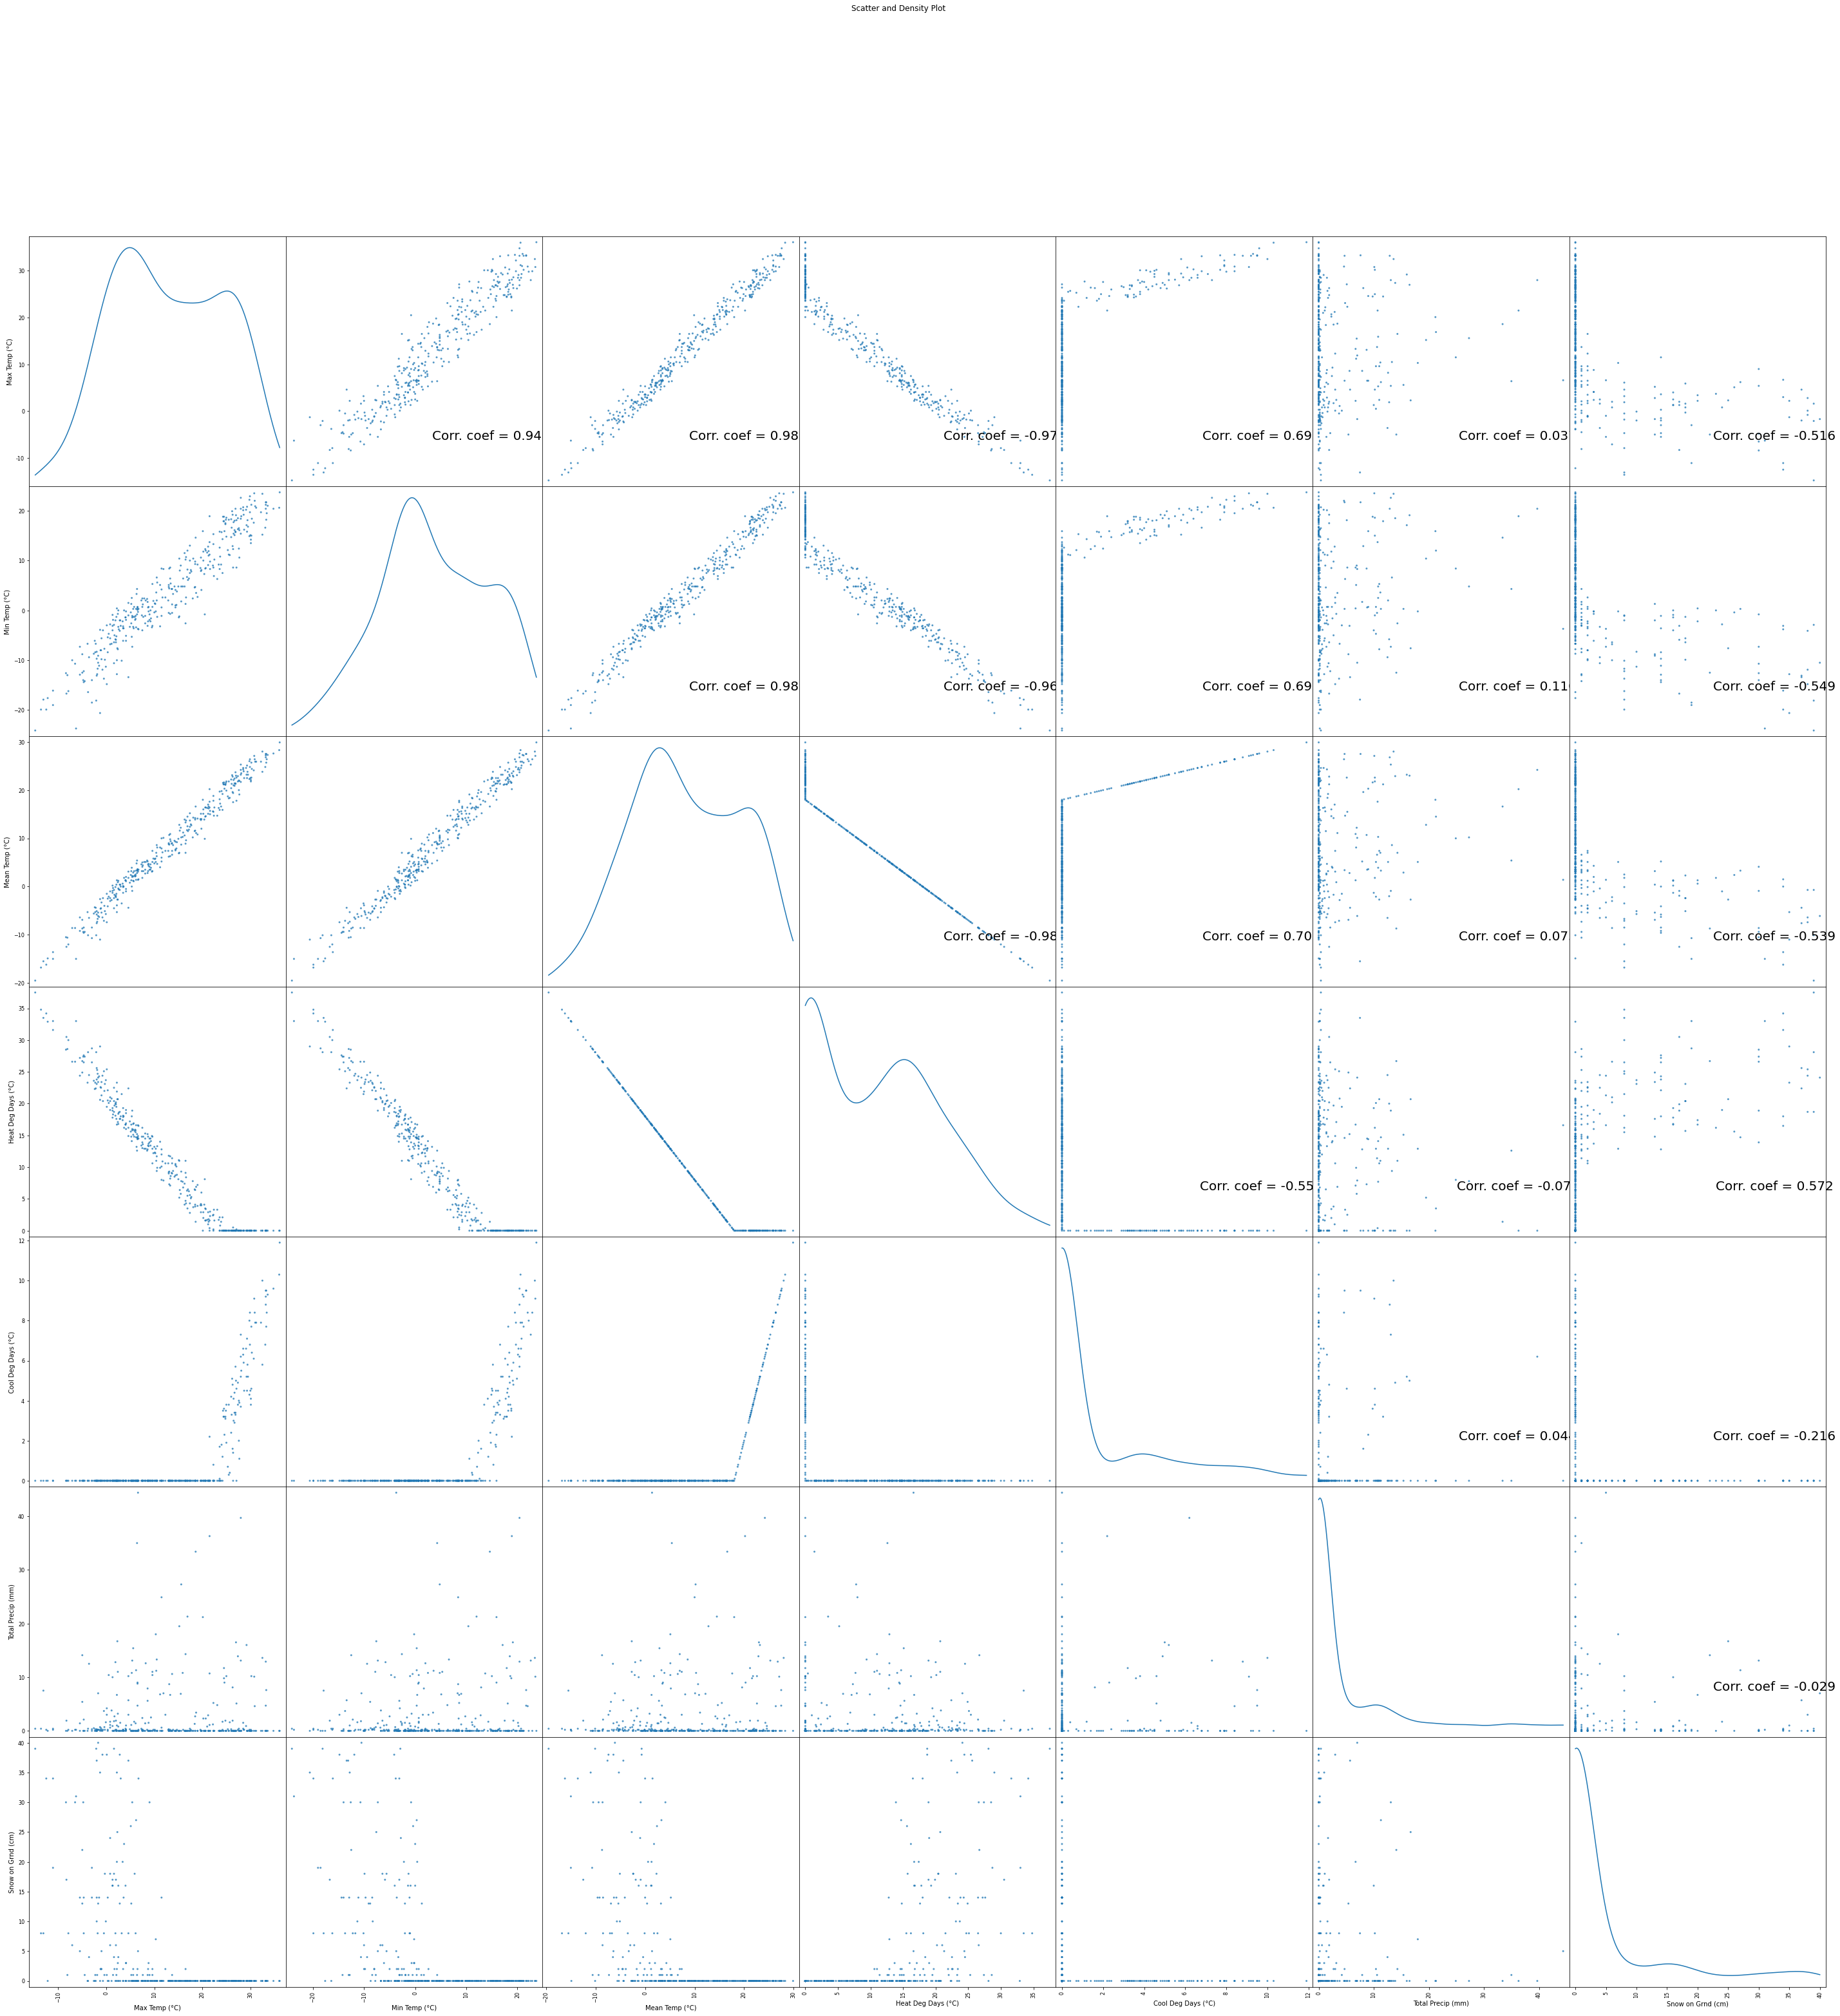

In [38]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
plotScatterMatrix(df, 50, 20)

In [71]:
X = StandardScaler().fit_transform(df)
X

array([[-0.99086451, -0.42820876, -0.73188231, ..., -0.4800235 ,
        -0.2873437 ,  1.27262781],
       [-0.76005637, -0.47517342, -0.63215076, ..., -0.4800235 ,
        -0.43320935,  1.27262781],
       [-0.65747497, -0.22156424, -0.45988717, ..., -0.4800235 ,
        -0.43320935,  0.94971337],
       ...,
       [-1.32425406, -1.16085752, -1.25773957, ..., -0.4800235 ,
        -0.35217288, -0.44958253],
       [-0.89683157, -1.07632112, -0.99481094, ..., -0.4800235 ,
         1.34959309, -0.44958253],
       [-0.75150792, -0.91664126, -0.84068036, ..., -0.4800235 ,
        -0.2711364 , -0.12666809]])

In [77]:
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
label = model.fit_predict(X)

C:\Users\asady\.conda\envs\Gower\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

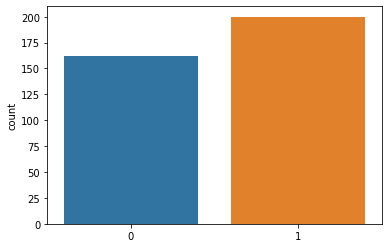

In [78]:
sns.countplot(label)

For n_clusters = 2 The average silhouette_score is : 0.43080615908682107
For n_clusters = 3 The average silhouette_score is : 0.39867852623247796
For n_clusters = 4 The average silhouette_score is : 0.38934896944887765
For n_clusters = 5 The average silhouette_score is : 0.4195562764172885
For n_clusters = 6 The average silhouette_score is : 0.39682720766222795
For n_clusters = 7 The average silhouette_score is : 0.3918910215375255
For n_clusters = 8 The average silhouette_score is : 0.4018944661293985
For n_clusters = 9 The average silhouette_score is : 0.42238818510069986
For n_clusters = 10 The average silhouette_score is : 0.39791963069697545


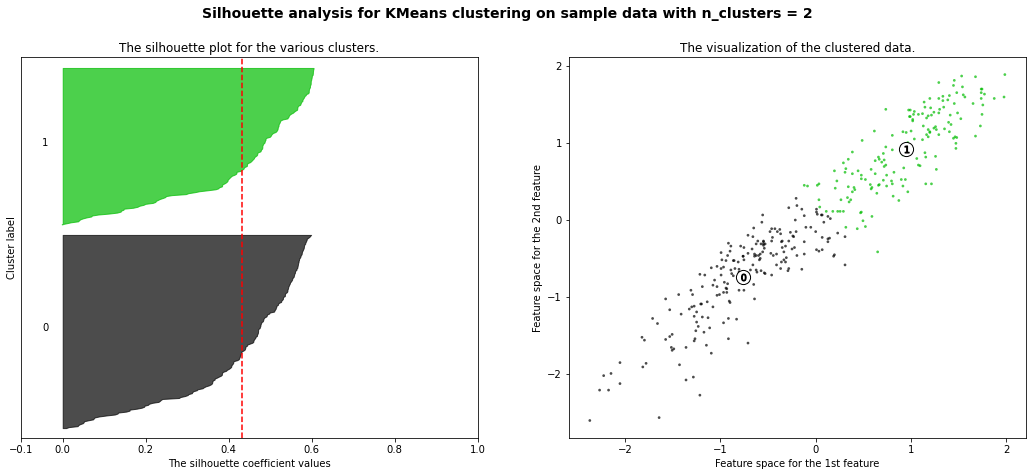

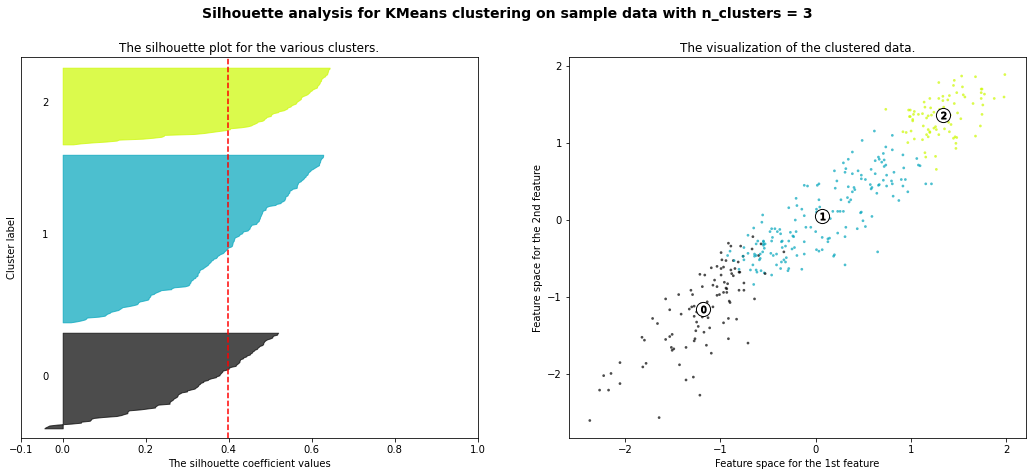

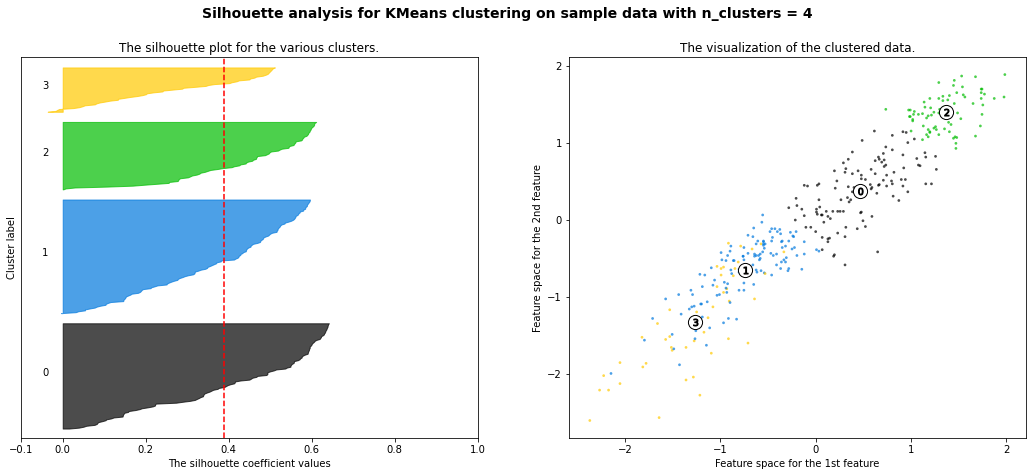

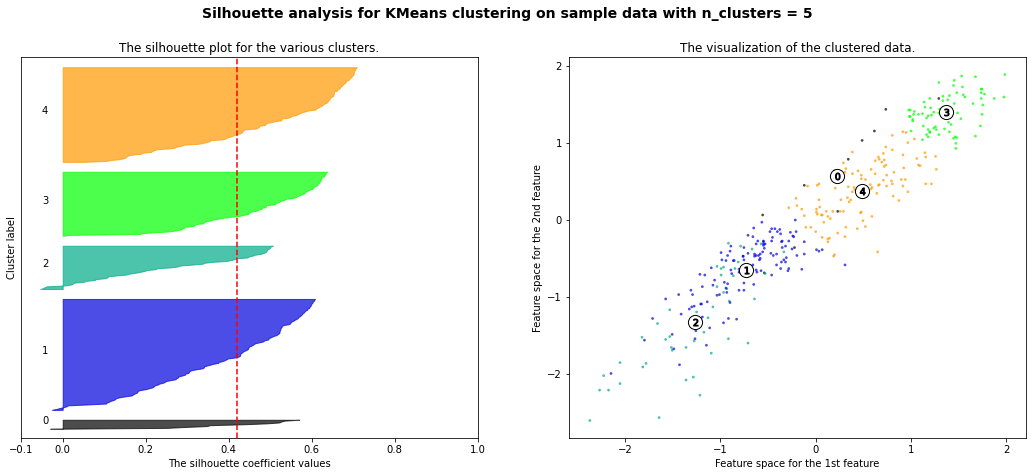

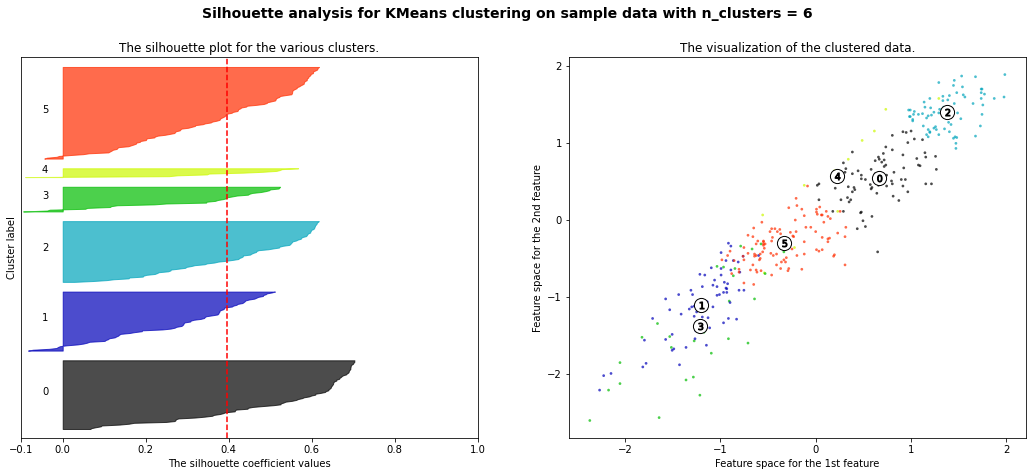

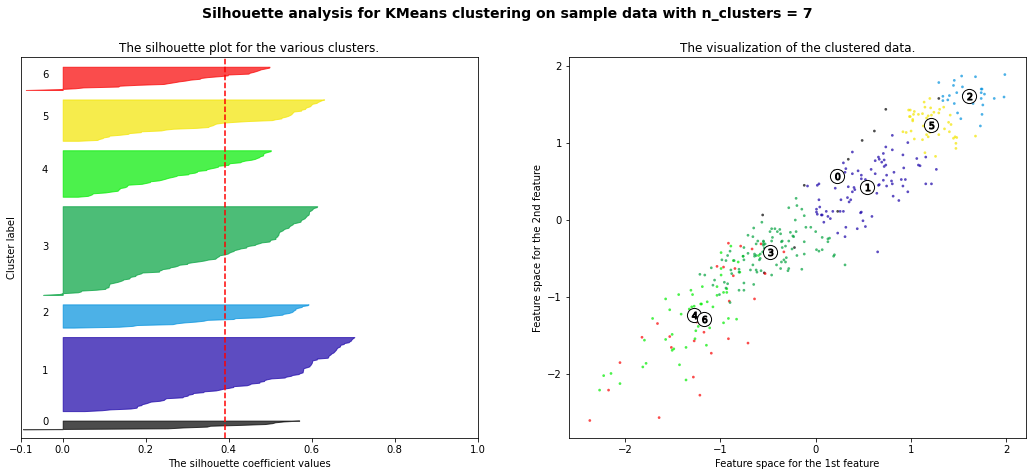

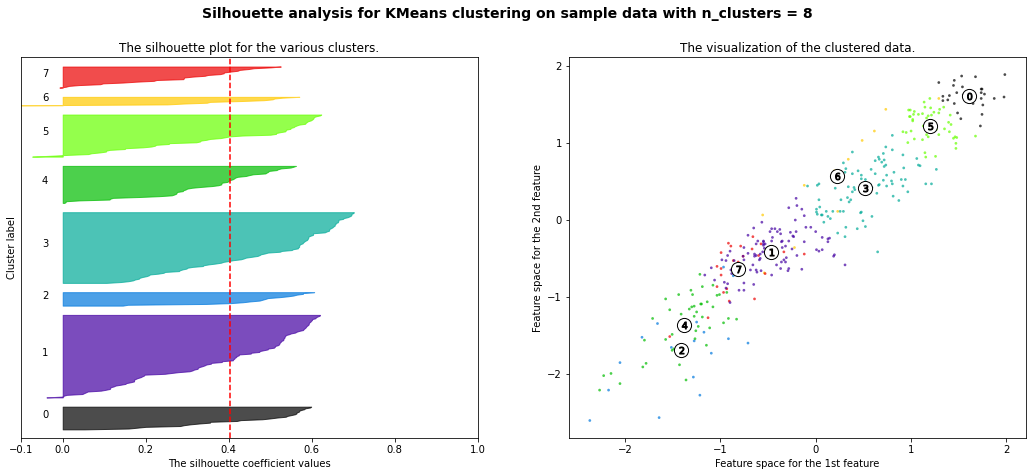

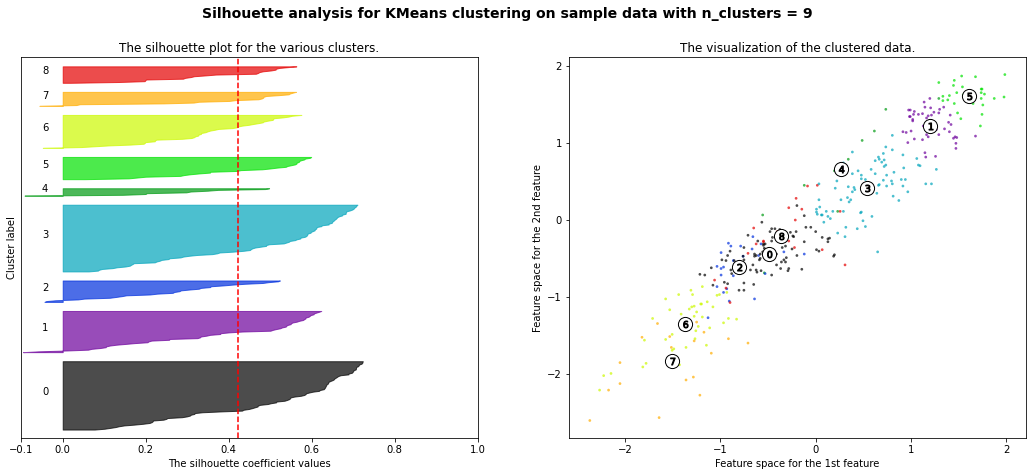

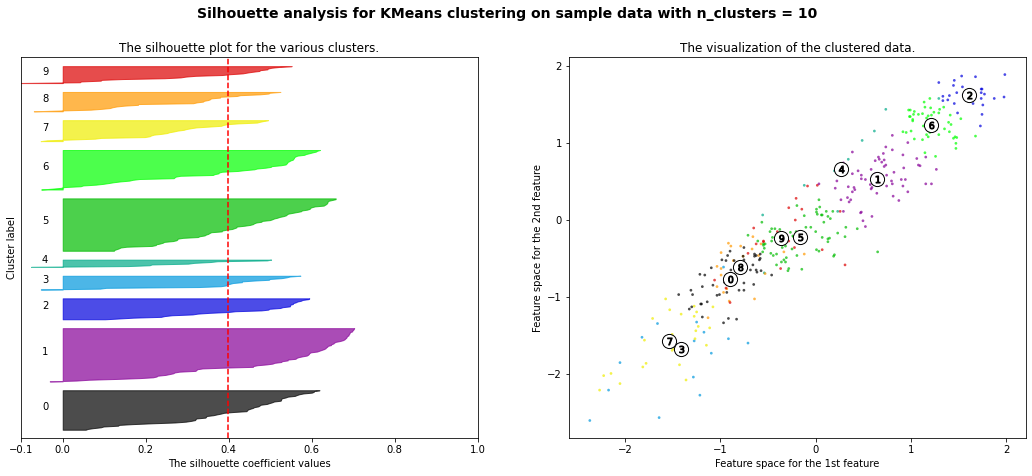

In [80]:
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
################################### Normalized data + KMeans #############################################################

In [3]:
dn = pd.read_csv('D:/Resource/Data/CSV/Weather091521.csv', parse_dates=True)
dn.set_index('Date/Time', inplace = True)
dn

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
Date/Time                                                                      
2020-01-01            1.3           -0.9             0.2                17.8   
2020-01-02            4.0           -1.4             1.3                16.7   
2020-01-03            5.2            1.3             3.2                14.8   
2020-01-04            1.9           -2.0            -0.1                18.1   
2020-01-05           -1.8          -11.7            -6.7                24.7   
2020-01-06           -4.7          -12.2            -8.5                26.5   
2020-01-07           -2.0           -8.3            -5.1                23.1   
2020-01-08           -0.1          -11.3            -5.7                23.7   
2020-01-09           -7.9          -16.2           -12.0                30.0   
2020-01-10            3.2          -10.1            -3.5                21.5   
2020-01-11            6.6           -3.7             1.4                16.6   
2020-01-12           -3.6           -9.4            -6.5                24.5   
2020-01-13           -7.1          -10.0            -8.6                26.6   
2020-01-14           -5.5           -7.3            -6.4                24.4   
2020-01-15            0.8           -6.8            -3.0                21.0   
2020-01-16           -0.5          -13.7            -7.1                25.1   
2020-01-17          -13.6          -19.9           -16.8                34.8   
2020-01-18          -13.1          -17.9           -15.5                33.5   
2020-01-19           -8.3          -16.7           -12.5                30.5   
2020-01-20          -11.1          -19.0           -15.0                33.0   
2020-01-21           -3.0          -18.5           -10.7                28.7   
2020-01-22            1.6           -6.4            -2.4                20.4   
2020-01-23            2.0           -5.9            -1.9                19.9   
2020-01-24            1.3           -3.1            -0.9                18.9   
2020-01-25            1.3           -4.0            -1.3                19.3   
2020-01-26            2.2            0.4             1.3                16.7   
2020-01-27            2.5            0.0             1.2                16.8   
2020-01-28            0.3           -8.4            -4.1                22.1   
2020-01-29           -5.5          -12.9            -9.2                27.2   
2020-01-30           -4.7          -14.4            -9.6                27.6   
2020-01-31           -3.0          -14.0            -8.5                26.5   
2020-02-01           -2.0           -9.7            -5.8                23.8   
2020-02-02           -1.5          -11.1            -6.3                24.3   
2020-02-03            3.6           -3.6             0.0                18.0   
2020-02-04            2.8           -2.0             0.4                17.6   
2020-02-05           -1.7           -9.1            -5.4                23.4   
2020-02-06           -5.0           -8.8            -6.9                24.9   
2020-02-07           -5.0          -12.5            -8.7                26.7   
2020-02-08          -12.5          -19.9           -16.2                34.2   
2020-02-09           -6.3          -23.7           -15.0                33.0   
2020-02-10           -1.7          -10.5            -6.1                24.1   
2020-02-11           -0.8          -11.9            -6.4                24.4   
2020-02-12            1.6           -2.9            -0.7                18.7   
2020-02-13            0.1          -14.8            -7.4                25.4   
2020-02-14          -14.8          -24.1           -19.5                37.5   
2020-02-15           -2.1          -18.1           -10.1                28.1   
2020-02-16            2.8           -4.1            -0.7                18.7   
2020-02-17           -2.0          -13.1            -7.6                25.6   
2020-02-18  

In [81]:
names = dn.columns
d = preprocessing.normalize(dn)
scaled_df = pd.DataFrame(d, columns=names)

In [83]:
scaled_df.sort_values(ascending=True, by='Max Temp (°C)')

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
17       -0.294790      -0.402805       -0.348798            0.753853   
16       -0.294099      -0.430336       -0.363299            0.752547   
346      -0.290557      -0.419164       -0.354860            0.783551   
19       -0.238875      -0.408886       -0.322805            0.710170   
347      -0.237219      -0.380721       -0.310434            0.837587   
44       -0.230926      -0.376035       -0.304260            0.585116   
12       -0.228211      -0.321424       -0.276424            0.854987   
38       -0.223059      -0.355109       -0.289084            0.610288   
50       -0.212751      -0.308584       -0.260667            0.605669   
8        -0.208699      -0.427965       -0.317011            0.792528   
13       -0.201259      -0.267125       -0.234192            0.892857   
18       -0.199731      -0.401869       -0.300800            0.733952   
59       -0.185443      -0.278164       -0.231803            0.629180   
36       -0.160688      -0.282811       -0.221749            0.800225   
28       -0.157649      -0.369760       -0.263705            0.779648   
338      -0.155247      -0.266706       -0.210976            0.927500   
58       -0.151602      -0.249560       -0.200581            0.620402   
5        -0.147609      -0.383156       -0.266953            0.832264   
348      -0.138086      -0.435737       -0.288445            0.840788   
29       -0.131401      -0.402591       -0.268394            0.771633   
37       -0.122993      -0.307483       -0.214008            0.656783   
11       -0.118943      -0.310573       -0.214758            0.809472   
39       -0.117467      -0.441898       -0.279682            0.615301   
345      -0.110849      -0.478401       -0.294625            0.819698   
60       -0.108472      -0.316376       -0.212424            0.619194   
318      -0.101532      -0.258060       -0.181911            0.943400   
359      -0.100370      -0.335855       -0.216182            0.911054   
337      -0.092079      -0.280423       -0.184158            0.937534   
357      -0.090358      -0.330004       -0.208217            0.915367   
30       -0.087497      -0.408319       -0.247908            0.772890   
6        -0.073892      -0.306651       -0.188424            0.853451   
20       -0.073845      -0.455379       -0.263381            0.706453   
31       -0.066882      -0.324378       -0.193958            0.795898   
349      -0.064721      -0.436013       -0.248664            0.861806   
4        -0.061410      -0.399164       -0.228581            0.842680   
344      -0.061384      -0.184153       -0.122769            0.972705   
35       -0.058956      -0.315588       -0.187272            0.811512   
80       -0.048933      -0.326218       -0.187576            0.921567   
32       -0.048623      -0.359814       -0.204218            0.787700   
74       -0.045059      -0.327704       -0.184333            0.921667   
70       -0.043770      -0.245110       -0.144440            0.932294   
47       -0.042091      -0.275699       -0.159948            0.538771   
45       -0.040085      -0.345490       -0.192787            0.536369   
81       -0.038412      -0.376433       -0.207422            0.898831   
40       -0.034845      -0.215222       -0.125034            0.493985   
336      -0.033430      -0.191029       -0.114618            0.974249   
51       -0.025431      -0.402989       -0.215188            0.567315   
41       -0.016969      -0.252417       -0.135754            0.517562   
356      -0.016889      -0.325112       -0.168889            0.928890   
15       -0.016256      -0.445414       -0.230835            0.816050   
66       -0.009575      -0.315960       -0.162767            0.737241   
7        -0.003483      -0.393549       -0.198516            0.825408   
43        0.002053      -0.303883       -0.151942            0.521530   
350       0.004938      -0.148132       -0.074066            0.

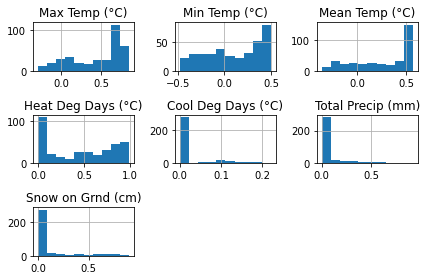

In [85]:
scaled_df.hist()
plt.tight_layout()

Initialization complete
Iteration 0, inertia 442.42188471120284.
Iteration 1, inertia 180.87220920801897.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 222.7242905414736
Iteration 1, inertia 92.23968961270694
Iteration 2, inertia 66.04103944767004
Iteration 3, inertia 64.46958869589078
Iteration 4, inertia 64.32130949569645
Iteration 5, inertia 64.31620954307765
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 57.39859237081666
Iteration 1, inertia 45.55098759032533
Iteration 2, inertia 44.717285108285516
Iteration 3, inertia 44.32905189479706
Iteration 4, inertia 44.09187864557699
Iteration 5, inertia 43.879435404985905
Iteration 6, inertia 43.83336642240908
Iteration 7, inertia 43.77845805156098
Iteration 8, inertia 43.77280632437126
Iteration 9, inertia 43.75638981547992
Iteration 10, inertia 43.7279003489357
Iteration 11, inertia 43.72282339051659
Iteration 12, inertia 43.71776238047088
Iteration

C:\Users\asady\.conda\envs\Gower\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


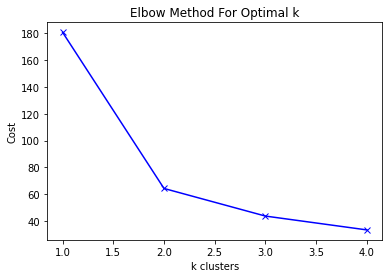

In [16]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    model = KMeans(n_clusters=num_clusters, init = 'k-means++', n_init = 1, verbose=1)
    model.fit_predict(scaled_df)
    cost.append(model.inertia_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
label = model.fit_predict(scaled_df)

For n_clusters = 2 The average silhouette_score is : 0.5635737450891308
For n_clusters = 3 The average silhouette_score is : 0.49542899554793257
For n_clusters = 4 The average silhouette_score is : 0.4998625611059009
For n_clusters = 5 The average silhouette_score is : 0.5103872041733034
For n_clusters = 6 The average silhouette_score is : 0.4768876610519626
For n_clusters = 7 The average silhouette_score is : 0.4540672574649377
For n_clusters = 8 The average silhouette_score is : 0.4419308248264508
For n_clusters = 9 The average silhouette_score is : 0.42547627098699287
For n_clusters = 10 The average silhouette_score is : 0.35968968857130007


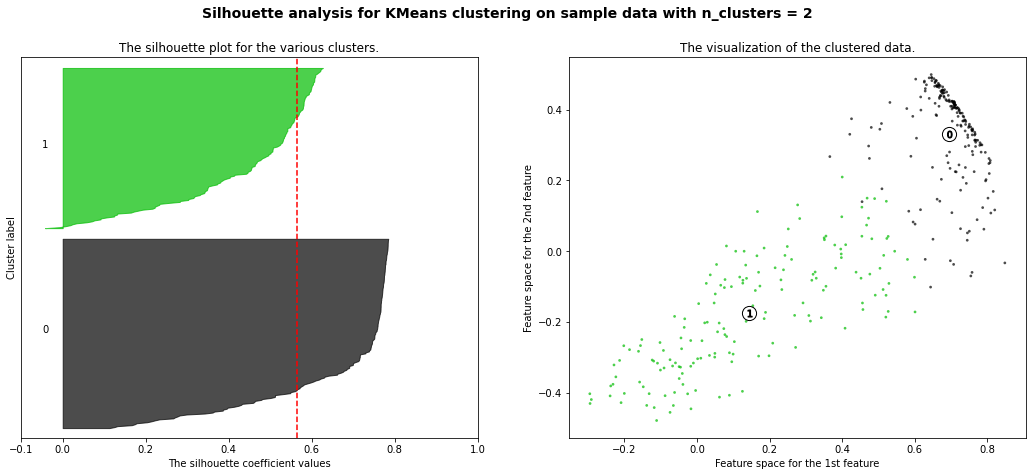

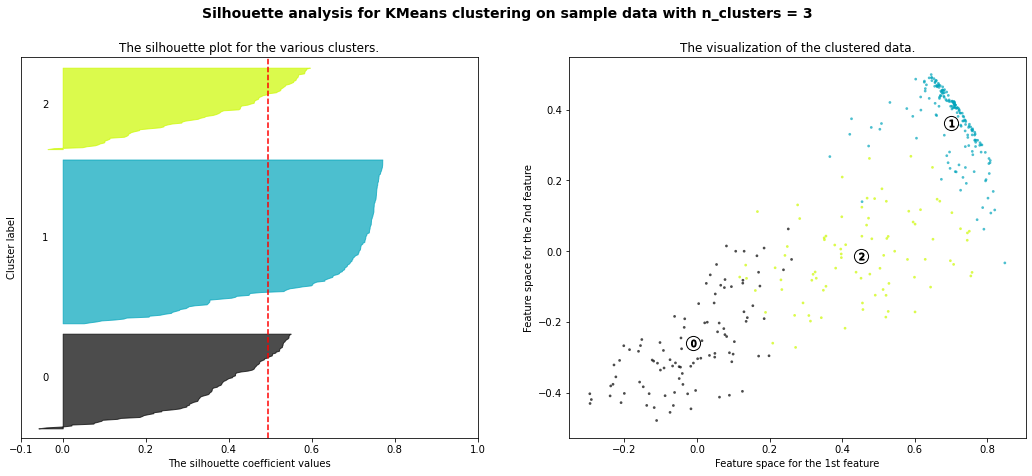

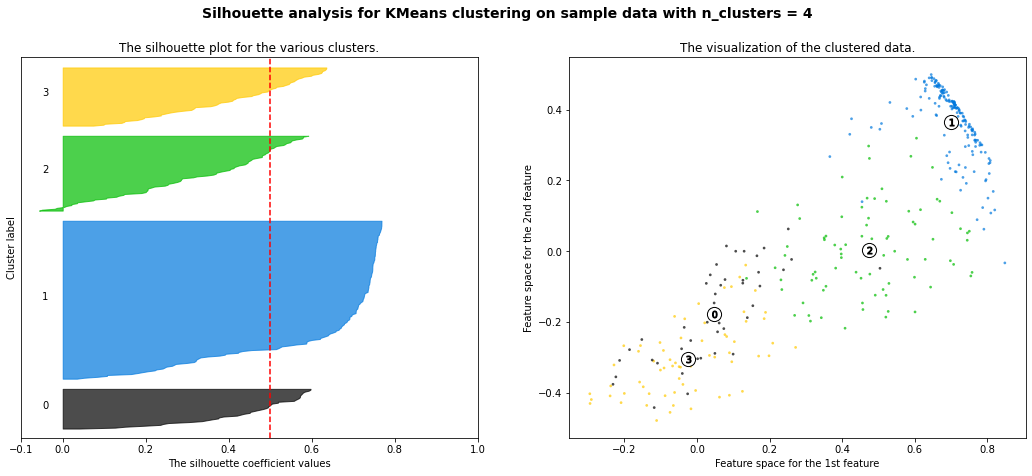

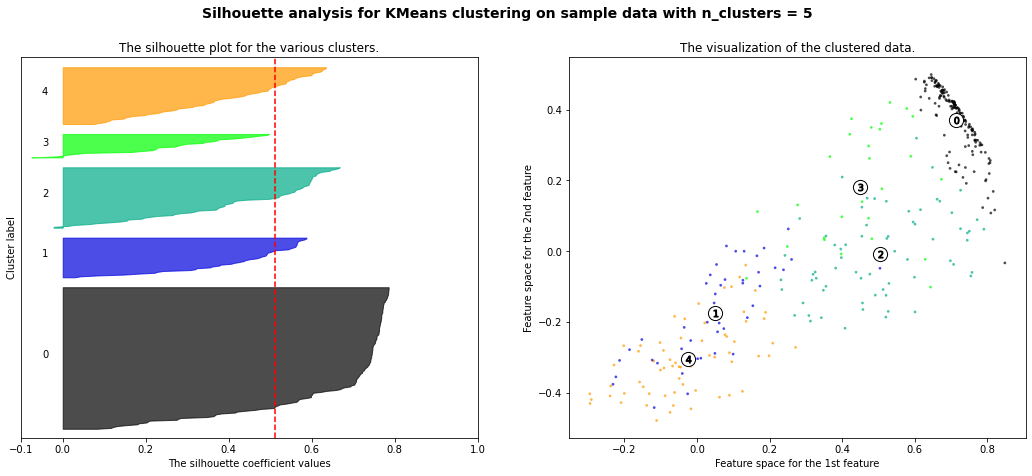

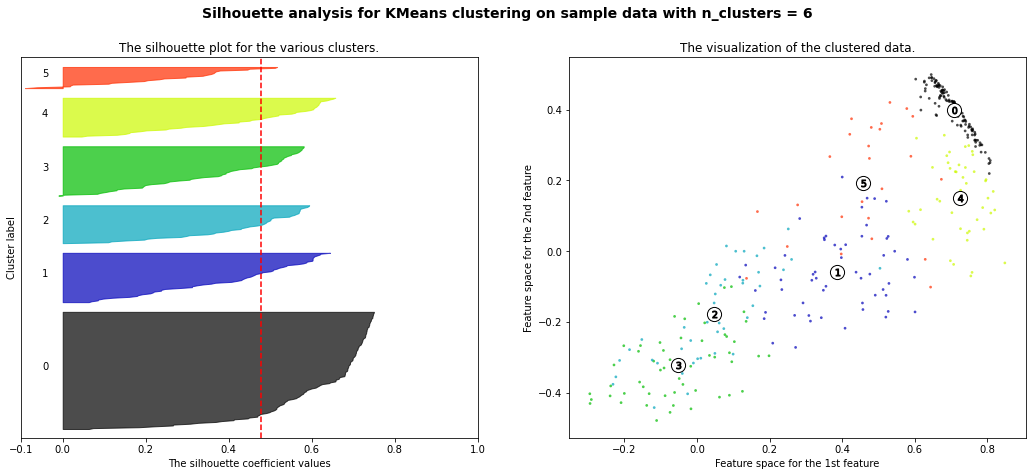

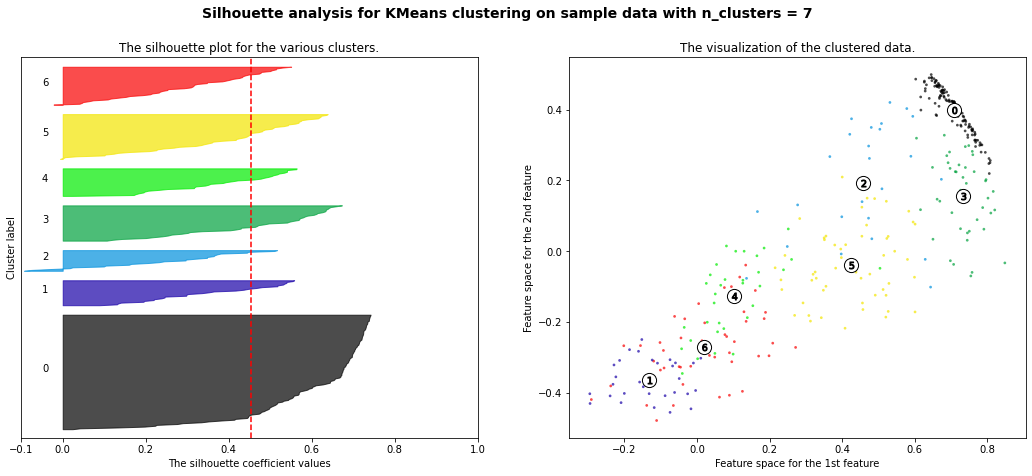

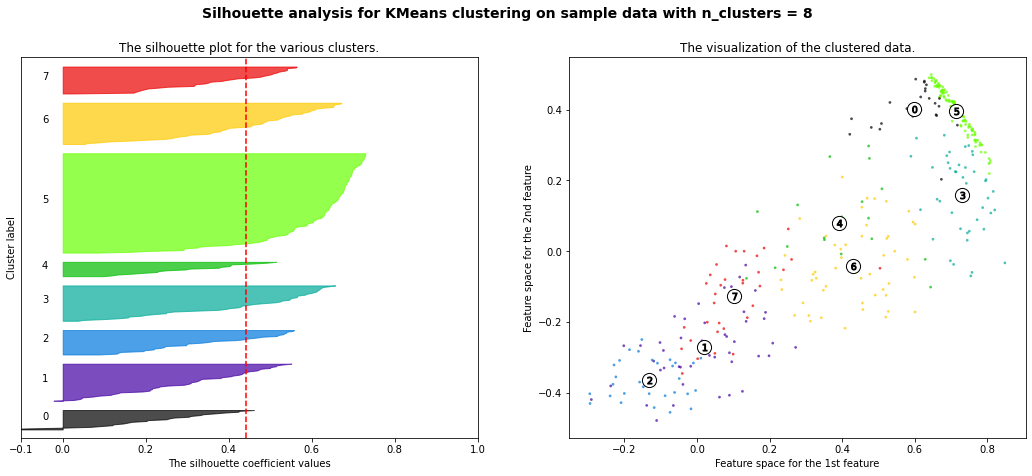

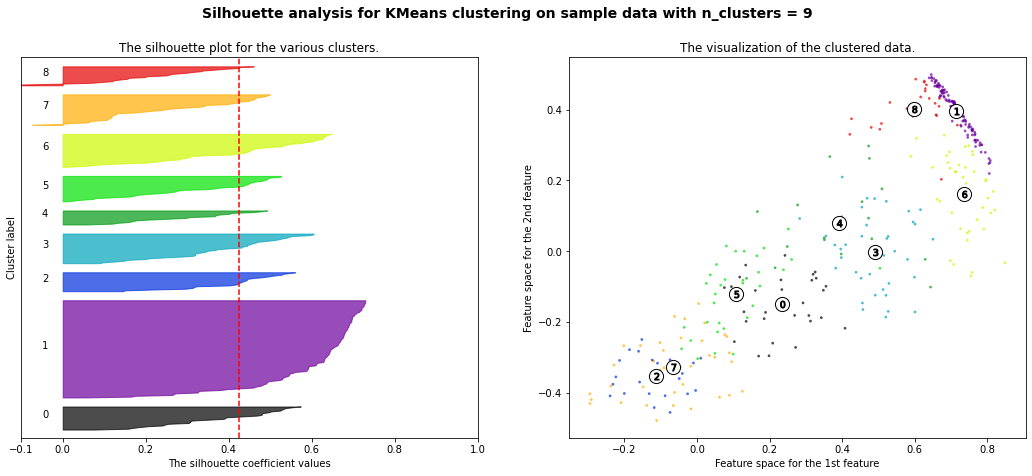

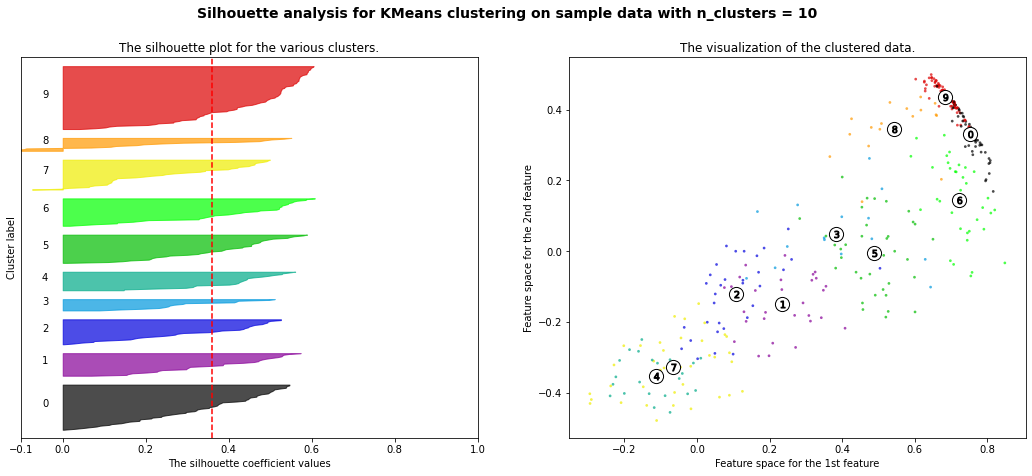

In [18]:
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
################################### Normalized data + AHC ######################################

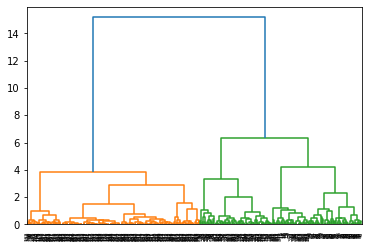

In [45]:
mergingsw = linkage(scaled_df, method="ward", metric='euclidean')
dendrogram(mergingsw)
plt.show()

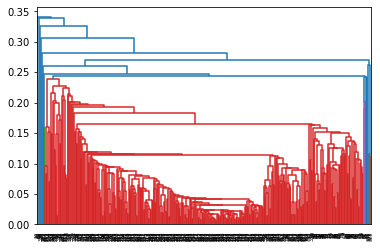

In [22]:
mergingss = linkage(scaled_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

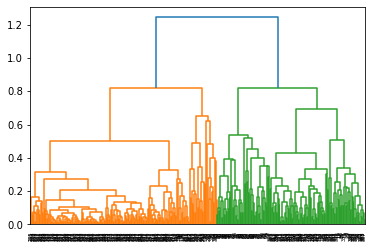

In [38]:
mergingsa = linkage(scaled_df, method="average", metric='euclidean')
dendrogram(mergingsa)
plt.show()

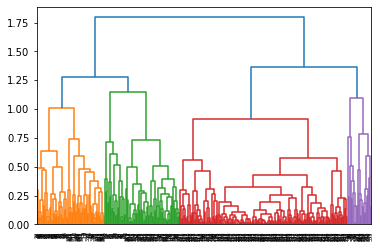

In [41]:
mergingsc = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(mergingsc)
plt.show()

In [52]:
type(mergingsc)

numpy.ndarray

In [78]:
model_ward = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
clusters_ward = model_ward.fit_predict(mergingsw)

In [79]:
metrics.silhouette_score(mergingsw, clusters_ward) 

0.5362548736409404

In [75]:
model_average = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='euclidean')
clusters_average = model_average.fit_predict(mergingsa)

In [76]:
metrics.silhouette_score(mergingsa, clusters_average) 

0.5119947890512914

In [72]:
model_complete = AgglomerativeClustering(n_clusters=12, linkage='complete', affinity='euclidean')
clusters_complete_dh_merged = model_complete.fit_predict(mergingsc)

In [73]:
metrics.silhouette_score(mergingsc, clusters_complete_dh_merged) 

0.40538515844060646

In [ ]:
################################### standardized data (MinMaxScaler) + lognormal ######################################

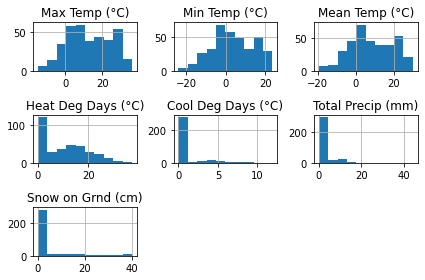

In [139]:
dno = pd.read_csv('D:/Resource/Data/CSV/Weather091521.csv', parse_dates=True)
dno.set_index('Date/Time', inplace = True)
dno.hist()
plt.tight_layout()

In [140]:
dno.describe().transpose()

count       mean        std   min    25%   50%     75%  \
Max Temp (°C)       362.0  12.891160  11.714218 -14.8  3.500  12.6  23.550   
Min Temp (°C)       362.0   3.658840  10.661037 -24.1 -3.275   2.4  12.075   
Mean Temp (°C)      362.0   8.272376  11.044875 -19.5  0.125   7.4  17.575   
Heat Deg Days (°C)  362.0  10.929006   9.453866   0.0  0.425  10.6  17.875   
Cool Deg Days (°C)  362.0   1.201381   2.506219   0.0  0.000   0.0   0.000   
Total Precip (mm)   362.0   2.672928   6.178601   0.0  0.000   0.0   1.600   
Snow on Grnd (cm)   362.0   4.176796   9.303245   0.0  0.000   0.0   2.000   

                     max  
Max Temp (°C)       36.1  
Min Temp (°C)       23.7  
Mean Temp (°C)      29.9  
Heat Deg Days (°C)  37.5  
Cool Deg Days (°C)  11.9  
Total Precip (mm)   44.4  
Snow on Grnd (cm)   40.0

In [141]:
#dno['Max Temp'] = dno['Max Temp (°C)'] + 25
#dno['Min Temp'] = dno['Min Temp (°C)'] + 25
#dno['Mean Temp'] = dno['Mean Temp (°C)'] + 25
dno['Heat Deg Days'] = dno['Heat Deg Days (°C)'] + 1
dno['Cool Deg Days'] = dno['Cool Deg Days (°C)'] + 1
dno['Total Precip'] = dno['Total Precip (mm)'] + 1
dno['Snow on Grnd'] = dno['Snow on Grnd (cm)'] + 1
dno

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
Date/Time                                                                      
2020-01-01            1.3           -0.9             0.2                17.8   
2020-01-02            4.0           -1.4             1.3                16.7   
2020-01-03            5.2            1.3             3.2                14.8   
2020-01-04            1.9           -2.0            -0.1                18.1   
2020-01-05           -1.8          -11.7            -6.7                24.7   
2020-01-06           -4.7          -12.2            -8.5                26.5   
2020-01-07           -2.0           -8.3            -5.1                23.1   
2020-01-08           -0.1          -11.3            -5.7                23.7   
2020-01-09           -7.9          -16.2           -12.0                30.0   
2020-01-10            3.2          -10.1            -3.5                21.5   
2020-01-11            6.6           -3.7             1.4                16.6   
2020-01-12           -3.6           -9.4            -6.5                24.5   
2020-01-13           -7.1          -10.0            -8.6                26.6   
2020-01-14           -5.5           -7.3            -6.4                24.4   
2020-01-15            0.8           -6.8            -3.0                21.0   
2020-01-16           -0.5          -13.7            -7.1                25.1   
2020-01-17          -13.6          -19.9           -16.8                34.8   
2020-01-18          -13.1          -17.9           -15.5                33.5   
2020-01-19           -8.3          -16.7           -12.5                30.5   
2020-01-20          -11.1          -19.0           -15.0                33.0   
2020-01-21           -3.0          -18.5           -10.7                28.7   
2020-01-22            1.6           -6.4            -2.4                20.4   
2020-01-23            2.0           -5.9            -1.9                19.9   
2020-01-24            1.3           -3.1            -0.9                18.9   
2020-01-25            1.3           -4.0            -1.3                19.3   
2020-01-26            2.2            0.4             1.3                16.7   
2020-01-27            2.5            0.0             1.2                16.8   
2020-01-28            0.3           -8.4            -4.1                22.1   
2020-01-29           -5.5          -12.9            -9.2                27.2   
2020-01-30           -4.7          -14.4            -9.6                27.6   
2020-01-31           -3.0          -14.0            -8.5                26.5   
2020-02-01           -2.0           -9.7            -5.8                23.8   
2020-02-02           -1.5          -11.1            -6.3                24.3   
2020-02-03            3.6           -3.6             0.0                18.0   
2020-02-04            2.8           -2.0             0.4                17.6   
2020-02-05           -1.7           -9.1            -5.4                23.4   
2020-02-06           -5.0           -8.8            -6.9                24.9   
2020-02-07           -5.0          -12.5            -8.7                26.7   
2020-02-08          -12.5          -19.9           -16.2                34.2   
2020-02-09           -6.3          -23.7           -15.0                33.0   
2020-02-10           -1.7          -10.5            -6.1                24.1   
2020-02-11           -0.8          -11.9            -6.4                24.4   
2020-02-12            1.6           -2.9            -0.7                18.7   
2020-02-13            0.1          -14.8            -7.4                25.4   
2020-02-14          -14.8          -24.1           -19.5                37.5   
2020-02-15           -2.1          -18.1           -10.1                28.1   
2020-02-16            2.8           -4.1            -0.7                18.7   
2020-02-17           -2.0          -13.1            -7.6                25.6   
2020-02-18  

In [142]:
del dno['Heat Deg Days (°C)']
del dno['Cool Deg Days (°C)']
del dno['Total Precip (mm)']
del dno['Snow on Grnd (cm)']
dno.describe().transpose()

count       mean        std   min    25%   50%     75%   max
Max Temp (°C)   362.0  12.891160  11.714218 -14.8  3.500  12.6  23.550  36.1
Min Temp (°C)   362.0   3.658840  10.661037 -24.1 -3.275   2.4  12.075  23.7
Mean Temp (°C)  362.0   8.272376  11.044875 -19.5  0.125   7.4  17.575  29.9
Heat Deg Days   362.0  11.929006   9.453866   1.0  1.425  11.6  18.875  38.5
Cool Deg Days   362.0   2.201381   2.506219   1.0  1.000   1.0   1.000  12.9
Total Precip    362.0   3.672928   6.178601   1.0  1.000   1.0   2.600  45.4
Snow on Grnd    362.0   5.176796   9.303245   1.0  1.000   1.0   3.000  41.0

In [73]:
dno['Heat Deg Dayslog'] = np.log10(dno['Heat Deg Days'])
dno['Cool Deg Dayslog'] = np.log10(dno['Cool Deg Days'])
dno['Total Preciplog'] = np.log10(dno['Total Precip'])
dno['Snow on Grndlog'] = np.log10(dno['Snow on Grnd'])

In [74]:
del dno['Heat Deg Days']
del dno['Cool Deg Days']
del dno['Total Precip']
del dno['Snow on Grnd']

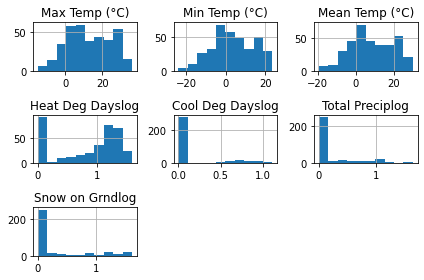

In [75]:
dno.hist()
plt.tight_layout()

In [79]:
dnomm=dno.copy()
dnomm.describe().transpose()

count       mean        std   min       25%        50%  \
Max Temp (°C)     362.0  12.891160  11.714218 -14.8  3.500000  12.600000   
Min Temp (°C)     362.0   3.658840  10.661037 -24.1 -3.275000   2.400000   
Mean Temp (°C)    362.0   8.272376  11.044875 -19.5  0.125000   7.400000   
Heat Deg Dayslog  362.0   0.834056   0.545541   0.0  0.153619   1.064458   
Cool Deg Dayslog  362.0   0.174678   0.330271   0.0  0.000000   0.000000   
Total Preciplog   362.0   0.270663   0.425601   0.0  0.000000   0.000000   
Snow on Grndlog   362.0   0.294264   0.512555   0.0  0.000000   0.000000   

                        75%        max  
Max Temp (°C)     23.550000  36.100000  
Min Temp (°C)     12.075000  23.700000  
Mean Temp (°C)    17.575000  29.900000  
Heat Deg Dayslog   1.275886   1.585461  
Cool Deg Dayslog   0.000000   1.110590  
Total Preciplog    0.414973   1.657056  
Snow on Grndlog    0.477121   1.612784

In [84]:
scaler = MinMaxScaler()
scaledmm = scaler.fit_transform(dnomm)

In [87]:
scaledmm

array([[0.31630648, 0.48535565, 0.39878543, ..., 0.        , 0.16822221,
        0.7629348 ],
       [0.36935167, 0.4748954 , 0.42105263, ..., 0.        , 0.        ,
        0.7629348 ],
       [0.39292731, 0.53138075, 0.45951417, ..., 0.        , 0.        ,
        0.71065198],
       ...,
       [0.23968566, 0.32217573, 0.28137652, ..., 0.        , 0.10626755,
        0.        ],
       [0.33791749, 0.34100418, 0.34008097, ..., 0.        , 0.65126426,
        0.        ],
       [0.37131631, 0.37656904, 0.37449393, ..., 0.        , 0.18166557,
        0.37330482]])

In [92]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(scaledmm)

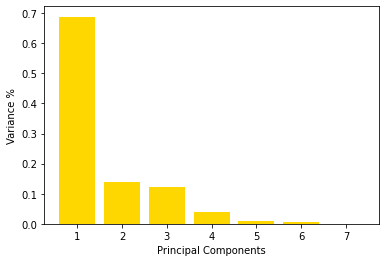

In [93]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

C:\Users\asady\.conda\envs\Gower\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


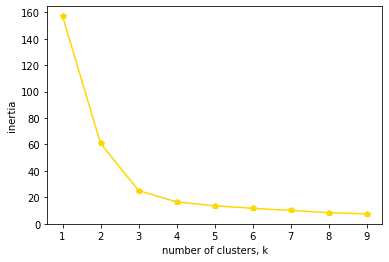

In [138]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
#plt.xticks()
plt.show()

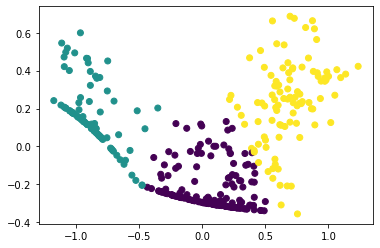

In [103]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [104]:
metrics.silhouette_score(PCA_components.iloc[:,:2], labels)

0.5742985379868936

In [127]:
agg_comp = AgglomerativeClustering(linkage ='complete', n_clusters=3)
ascaledmm_comp = agg_comp.fit_predict(PCA_components.iloc[:,:2])
labels_comp = agg_comp.labels_

In [115]:
metrics.silhouette_score(PCA_components.iloc[:,:2], labels_comp)

0.4456863853894436

In [131]:
agg_comp = AgglomerativeClustering(linkage ='complete', n_clusters=3)
ascaledmm_comp = agg_comp.fit_predict(PCA_components.iloc[:,:2])
labels_comp = agg_comp.labels_
agg_avg = AgglomerativeClustering(linkage ='average', n_clusters=3)
ascaledmm_avg = agg_avg.fit_predict(PCA_components.iloc[:,:2])
labelscaledmm_avg = agg_avg.labels_
agg_ward = AgglomerativeClustering(linkage ='ward', n_clusters=3)
ascaledmm_ward = agg_ward.fit_predict(PCA_components.iloc[:,:2])
labelscaledmm_ward = agg_ward.labels_

In [132]:
metrics.silhouette_score(PCA_components.iloc[:,:2], labelscaledmm_ward)

0.5747764908300999

In [133]:
metrics.silhouette_score(PCA_components.iloc[:,:2],labelscaledmm_avg)  

0.5747764908300999

In [ ]:
################################### standardized data (StandardScaler) + BOXCOX ######################################

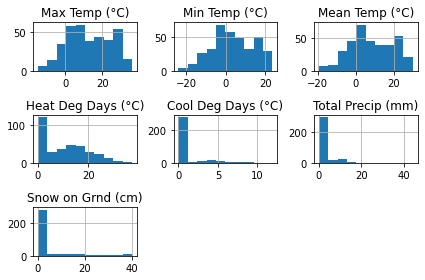

In [29]:
dp = pd.read_csv('D:/Resource/Data/CSV/Weather091521.csv', parse_dates=True)
#dp.set_index('Date/Time', inplace = True)
dp.hist()
plt.tight_layout()

In [23]:
dp.describe().transpose()

count       mean        std   min    25%   50%     75%  \
Max Temp (°C)       362.0  12.891160  11.714218 -14.8  3.500  12.6  23.550   
Min Temp (°C)       362.0   3.658840  10.661037 -24.1 -3.275   2.4  12.075   
Mean Temp (°C)      362.0   8.272376  11.044875 -19.5  0.125   7.4  17.575   
Heat Deg Days (°C)  362.0  10.929006   9.453866   0.0  0.425  10.6  17.875   
Cool Deg Days (°C)  362.0   1.201381   2.506219   0.0  0.000   0.0   0.000   
Total Precip (mm)   362.0   2.672928   6.178601   0.0  0.000   0.0   1.600   
Snow on Grnd (cm)   362.0   4.176796   9.303245   0.0  0.000   0.0   2.000   

                     max  
Max Temp (°C)       36.1  
Min Temp (°C)       23.7  
Mean Temp (°C)      29.9  
Heat Deg Days (°C)  37.5  
Cool Deg Days (°C)  11.9  
Total Precip (mm)   44.4  
Snow on Grnd (cm)   40.0

In [13]:
dp['Heat Deg Days (°C)'].skew(), dp['Cool Deg Days (°C)'].skew(), dp['Total Precip (mm)'].skew(), dp['Snow on Grnd (cm)'].skew()

(0.4269109243603689, 2.0940652975848684, 3.549457771027665, 2.459880722744339)

In [30]:
dp['Heat Deg Days'] = dp['Heat Deg Days (°C)'] + 1
dp['Cool Deg Days'] = dp['Cool Deg Days (°C)'] + 1
dp['Total Precip'] = dp['Total Precip (mm)'] + 1
dp['Snow on Grnd'] = dp['Snow on Grnd (cm)'] + 1
dp.describe().transpose()

count       mean        std   min    25%   50%     75%  \
Max Temp (°C)       362.0  12.891160  11.714218 -14.8  3.500  12.6  23.550   
Min Temp (°C)       362.0   3.658840  10.661037 -24.1 -3.275   2.4  12.075   
Mean Temp (°C)      362.0   8.272376  11.044875 -19.5  0.125   7.4  17.575   
Heat Deg Days (°C)  362.0  10.929006   9.453866   0.0  0.425  10.6  17.875   
Cool Deg Days (°C)  362.0   1.201381   2.506219   0.0  0.000   0.0   0.000   
Total Precip (mm)   362.0   2.672928   6.178601   0.0  0.000   0.0   1.600   
Snow on Grnd (cm)   362.0   4.176796   9.303245   0.0  0.000   0.0   2.000   
Heat Deg Days       362.0  11.929006   9.453866   1.0  1.425  11.6  18.875   
Cool Deg Days       362.0   2.201381   2.506219   1.0  1.000   1.0   1.000   
Total Precip        362.0   3.672928   6.178601   1.0  1.000   1.0   2.600   
Snow on Grnd        362.0   5.176796   9.303245   1.0  1.000   1.0   3.000   

                     max  
Max Temp (°C)       36.1  
Min Temp (°C)       23.7  
Mean Temp (°C)      29.9  
Heat Deg Days (°C)  37.5  
Cool Deg Days (°C)  11.9  
Total Precip (mm)   44.4  
Snow on Grnd (cm)   40.0  
Heat Deg Days       38.5  
Cool Deg Days       12.9  
Total Precip        45.4  
Snow on Grnd        41.0

In [31]:
del dp['Heat Deg Days (°C)']
del dp['Cool Deg Days (°C)']
del dp['Total Precip (mm)']
del dp['Snow on Grnd (cm)']

In [26]:
dp.describe().transpose()

count       mean        std   min    25%   50%     75%   max
Max Temp (°C)   362.0  12.891160  11.714218 -14.8  3.500  12.6  23.550  36.1
Min Temp (°C)   362.0   3.658840  10.661037 -24.1 -3.275   2.4  12.075  23.7
Mean Temp (°C)  362.0   8.272376  11.044875 -19.5  0.125   7.4  17.575  29.9
Heat Deg Days   362.0  11.929006   9.453866   1.0  1.425  11.6  18.875  38.5
Cool Deg Days   362.0   2.201381   2.506219   1.0  1.000   1.0   1.000  12.9
Total Precip    362.0   3.672928   6.178601   1.0  1.000   1.0   2.600  45.4
Snow on Grnd    362.0   5.176796   9.303245   1.0  1.000   1.0   3.000  41.0

In [32]:
transformer = BoxCoxTransformer()
dp['Heat Deg Days'] = transformer.fit_transform(dp['Heat Deg Days'])
dp['Cool Deg Days'] = transformer.fit_transform(dp['Cool Deg Days'])
dp['Total Precip'] = transformer.fit_transform(dp['Total Precip'])
dp['Snow on Grnd'] = transformer.fit_transform(dp['Snow on Grnd'])

In [28]:
dp.describe().transpose()

count       mean        std   min     25%        50%  \
Max Temp (°C)   362.0  12.891160  11.714218 -14.8  3.5000  12.600000   
Min Temp (°C)   362.0   3.658840  10.661037 -24.1 -3.2750   2.400000   
Mean Temp (°C)  362.0   8.272376  11.044875 -19.5  0.1250   7.400000   
Heat Deg Days   362.0   3.403154   2.428864   0.0  0.3787   4.039957   
Cool Deg Days   362.0   0.101377   0.182403   0.0  0.0000   0.000000   
Total Precip    362.0   0.240279   0.306887   0.0  0.0000   0.000000   
Snow on Grnd    362.0   0.214972   0.336900   0.0  0.0000   0.000000   

                      75%        max  
Max Temp (°C)   23.550000  36.100000  
Min Temp (°C)   12.075000  23.700000  
Mean Temp (°C)  17.575000  29.900000  
Heat Deg Days    5.392444   7.881812  
Cool Deg Days    0.000000   0.446070  
Total Precip     0.556885   0.790935  
Snow on Grnd     0.608812   0.819877

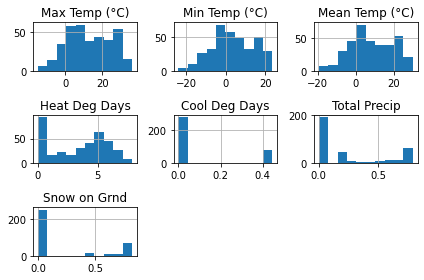

In [29]:
dp.hist()
plt.tight_layout()

In [30]:
dp.skew()

C:\Users\asady\AppData\Local\Temp/ipykernel_37120/3834211312.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dp.skew()


Max Temp (°C)    -0.009669
Min Temp (°C)    -0.095103
Mean Temp (°C)   -0.043207
Heat Deg Days    -0.242194
Cool Deg Days     1.266709
Total Precip      0.797684
Snow on Grnd      0.996262
dtype: float64

In [33]:
dp.set_index('Date/Time', inplace = True)

In [34]:
X = StandardScaler().fit_transform(dp)
y = MinMaxScaler().fit_transform(dp)

In [35]:
pca = PCA(n_components=7)
principalComponentx = pca.fit_transform(X)
principalComponenty = pca.fit_transform(y)

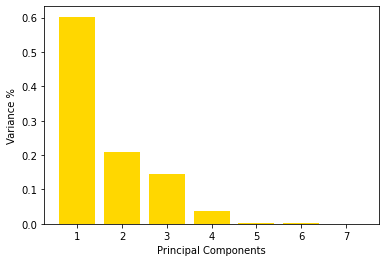

In [36]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_componentsx = pd.DataFrame(principalComponentx)

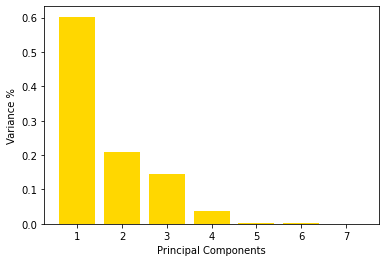

In [37]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_componentsy = pd.DataFrame(principalComponenty)

C:\Users\asady\.conda\envs\Gower\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


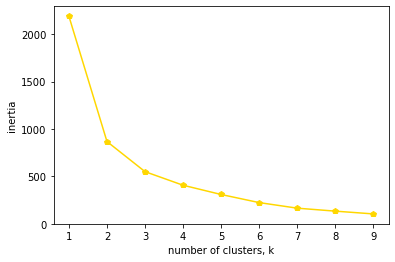

In [38]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_componentsx.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
#plt.xticks()
plt.show()

C:\Users\asady\.conda\envs\Gower\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


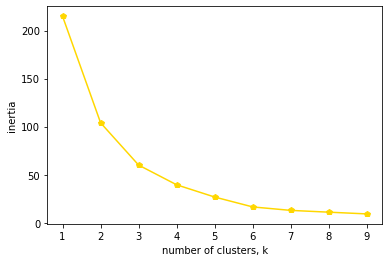

In [39]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_componentsy.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
#plt.xticks()
plt.show()

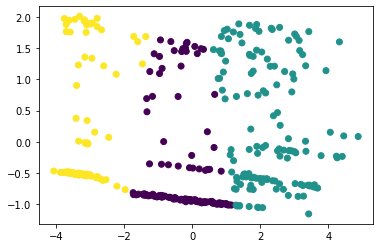

In [41]:
model = KMeans(n_clusters=3)
model.fit(PCA_componentsx.iloc[:,:2])

labelsx = model.predict(PCA_componentsx.iloc[:,:2])
plt.scatter(PCA_componentsx[0], PCA_componentsx[1], c=labelsx)
plt.show()

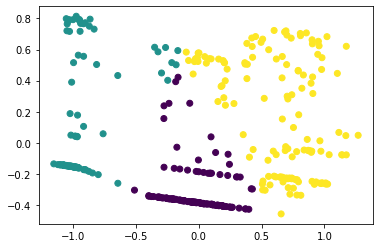

In [42]:
model = KMeans(n_clusters=3)
model.fit(PCA_componentsy.iloc[:,:2])

labelsy = model.predict(PCA_componentsy.iloc[:,:2])
plt.scatter(PCA_componentsy[0], PCA_componentsy[1], c=labelsy)
plt.show()

agg_compx = AgglomerativeClustering(linkage ='complete', n_clusters=3)
ascaledmm_compx = agg_compx.fit_predict(PCA_componentsx.iloc[:,:2])
labels_compx = agg_compx.labels_

agg_avgx = AgglomerativeClustering(linkage ='average', n_clusters=3)
ascaledmm_avgx = agg_avgx.fit_predict(PCA_componentsx.iloc[:,:2])
labelscaledmm_avgx = agg_avgx.labels_

agg_wardx = AgglomerativeClustering(linkage ='ward', n_clusters=3)
ascaledmm_ward = agg_wardx.fit_predict(PCA_componentsx.iloc[:,:2])
labelscaledmm_wardx = agg_wardx.labels_

In [47]:
agg_compy = AgglomerativeClustering(linkage ='complete', n_clusters=3)
ascaledmm_compy = agg_compy.fit_predict(PCA_componentsy.iloc[:,:2])
labels_compy = agg_compy.labels_

agg_avgy = AgglomerativeClustering(linkage ='average', n_clusters=3)
ascaledmm_avgy = agg_avgy.fit_predict(PCA_componentsy.iloc[:,:2])
labelscaledmm_avgy = agg_avgy.labels_

agg_wardy = AgglomerativeClustering(linkage ='ward', n_clusters=3)
ascaledmm_wardy = agg_wardy.fit_predict(PCA_componentsy.iloc[:,:2])
labelscaledmm_wardy = agg_wardy.labels_

In [46]:
metrics.silhouette_score(PCA_componentsx.iloc[:,:2], labelsx), metrics.silhouette_score(PCA_componentsx.iloc[:,:2], labels_compx), metrics.silhouette_score(PCA_componentsx.iloc[:,:2], labelscaledmm_wardx), metrics.silhouette_score(PCA_componentsx.iloc[:,:2],labelscaledmm_avgx)  

NameError: name 'labels_compx' is not defined

In [48]:
metrics.silhouette_score(PCA_componentsy.iloc[:,:2], labelsy), metrics.silhouette_score(PCA_componentsy.iloc[:,:2], labels_compy), metrics.silhouette_score(PCA_componentsy.iloc[:,:2], labelscaledmm_wardy), metrics.silhouette_score(PCA_componentsy.iloc[:,:2],labelscaledmm_avgy) 

(0.48966652408798456,
 0.4759511173986062,
 0.4631974471755346,
 0.47739974914777084)

In [1]:
################################### delete correlated columns+preprocessing ######################################

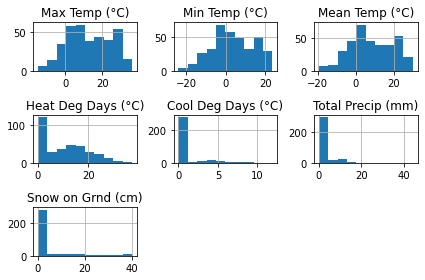

In [49]:
dd = pd.read_csv('D:/Resource/Data/CSV/Weather091521.csv', parse_dates=True)
dd.set_index('Date/Time', inplace = True)
dd.hist()
plt.tight_layout()

In [94]:
dd.describe().transpose()

count       mean        std   min    25%   50%     75%  \
Max Temp (°C)       362.0  12.891160  11.714218 -14.8  3.500  12.6  23.550   
Min Temp (°C)       362.0   3.658840  10.661037 -24.1 -3.275   2.4  12.075   
Mean Temp (°C)      362.0   8.272376  11.044875 -19.5  0.125   7.4  17.575   
Heat Deg Days (°C)  362.0  10.929006   9.453866   0.0  0.425  10.6  17.875   
Cool Deg Days (°C)  362.0   1.201381   2.506219   0.0  0.000   0.0   0.000   
Total Precip (mm)   362.0   2.672928   6.178601   0.0  0.000   0.0   1.600   
Snow on Grnd (cm)   362.0   4.176796   9.303245   0.0  0.000   0.0   2.000   

                     max  
Max Temp (°C)       36.1  
Min Temp (°C)       23.7  
Mean Temp (°C)      29.9  
Heat Deg Days (°C)  37.5  
Cool Deg Days (°C)  11.9  
Total Precip (mm)   44.4  
Snow on Grnd (cm)   40.0

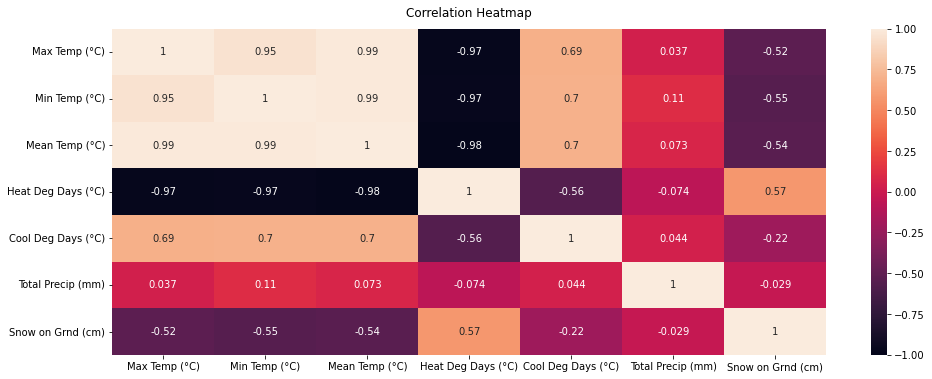

In [93]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dd.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [50]:
del dd['Mean Temp (°C)']
del dd['Heat Deg Days (°C)']
del dd['Min Temp (°C)']

In [51]:
dd['Cool Deg Days'] = dd['Cool Deg Days (°C)'] + 1
dd['Total Precip'] = dd['Total Precip (mm)'] + 1
dd['Snow on Grnd'] = dd['Snow on Grnd (cm)'] + 1

In [52]:
dd['Cool Deg Dayslog'] = np.log10(dd['Cool Deg Days'])
dd['Total Preciplog'] = np.log10(dd['Total Precip'])
dd['Snow on Grndlog'] = np.log10(dd['Snow on Grnd'])

In [53]:
scaler = MinMaxScaler()
w = scaler.fit_transform(dd)
z = MinMaxScaler().fit_transform(dd)

In [54]:
pca = PCA(n_components=7)
principalComponentw = pca.fit_transform(w)
principalComponentz = pca.fit_transform(z)

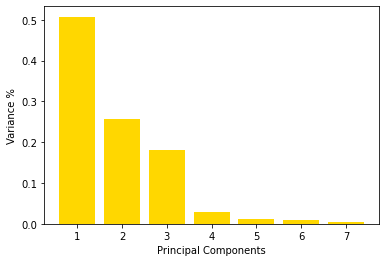

In [55]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_componentsw = pd.DataFrame(principalComponentw)

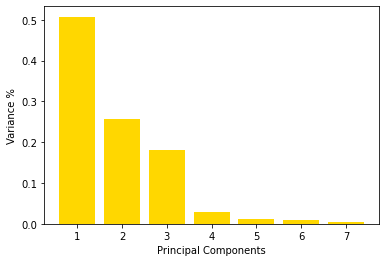

In [56]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_componentsz = pd.DataFrame(principalComponentz)

C:\Users\asady\.conda\envs\Gower\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


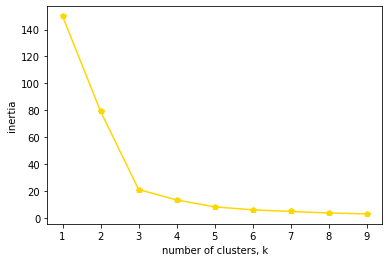

In [57]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_componentsw.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
#plt.xticks()
plt.show()

C:\Users\asady\.conda\envs\Gower\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


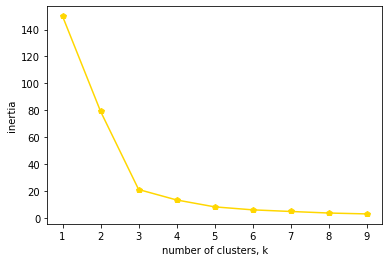

In [58]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_componentsz.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
#plt.xticks()
plt.show()

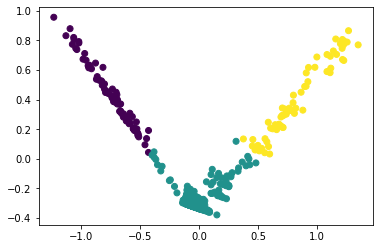

In [84]:
model = KMeans(n_clusters=3)
model.fit(PCA_componentsw.iloc[:,:2])

labelsw = model.predict(PCA_componentsw.iloc[:,:2])
plt.scatter(PCA_componentsw[0], PCA_componentsw[1], c=labelsw)
plt.show()

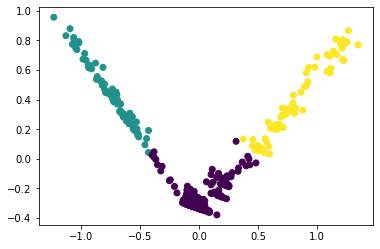

In [85]:
model = KMeans(n_clusters=3)
model.fit(PCA_componentsz.iloc[:,:2])

labelsz = model.predict(PCA_componentsz.iloc[:,:2])
plt.scatter(PCA_componentsz[0], PCA_componentsz[1], c=labelsz)
plt.show()

In [92]:
agg_compw = AgglomerativeClustering(linkage ='complete', n_clusters=3)
ascaledmm_compw = agg_compw.fit_predict(PCA_componentsw.iloc[:,:2])
labels_compw = agg_compw.labels_

agg_avgw = AgglomerativeClustering(linkage ='average', n_clusters=3)
ascaledmm_avgw = agg_avgw.fit_predict(PCA_componentsw.iloc[:,:2])
labelscaledmm_avgw = agg_avgw.labels_

agg_wardw = AgglomerativeClustering(linkage ='ward', n_clusters=3)
ascaledmm_wardw = agg_wardw.fit_predict(PCA_componentsw.iloc[:,:2])
labelscaledmm_wardw = agg_wardw.labels_

In [93]:
agg_compz = AgglomerativeClustering(linkage ='complete', n_clusters=3)
ascaledmm_compz = agg_compz.fit_predict(PCA_componentsz.iloc[:,:2])
labels_compz = agg_compz.labels_

agg_avgz = AgglomerativeClustering(linkage ='average', n_clusters=3)
ascaledmm_avgz = agg_avgz.fit_predict(PCA_componentsz.iloc[:,:2])
labelscaledmm_avgz = agg_avgz.labels_

agg_wardz = AgglomerativeClustering(linkage ='ward', n_clusters=3)
ascaledmm_wardz = agg_wardz.fit_predict(PCA_componentsz.iloc[:,:2])
labelscaledmm_wardz = agg_wardz.labels_

In [94]:
metrics.silhouette_score(PCA_componentsw.iloc[:,:2], labelsw), metrics.silhouette_score(PCA_componentsw.iloc[:,:2], labels_compw), metrics.silhouette_score(PCA_componentsw.iloc[:,:2], labelscaledmm_wardw), metrics.silhouette_score(PCA_componentsw.iloc[:,:2],labelscaledmm_avgw)  

(0.7230630609398417, 0.6787602491353038, 0.7214150743912936, 0.717999915204673)

In [88]:
metrics.silhouette_score(PCA_componentsz.iloc[:,:2], labelsz), metrics.silhouette_score(PCA_componentsz.iloc[:,:2], labels_compz), metrics.silhouette_score(PCA_componentsz.iloc[:,:2], labelscaledmm_wardz), metrics.silhouette_score(PCA_componentsz.iloc[:,:2],labelscaledmm_avgz)  

(0.7230630609398417, 0.6787602491353038, 0.7214150743912936, 0.717999915204673)

In [ ]:
################################### delete correlated columns ######################################

In [65]:
dd = pd.read_csv('D:/Resource/Data/CSV/Weather091521.csv', parse_dates=True)
dd.set_index('Date/Time', inplace = True)

In [66]:
del dd['Mean Temp (°C)']
del dd['Heat Deg Days (°C)']
del dd['Min Temp (°C)']

C:\Users\asady\.conda\envs\Gower\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


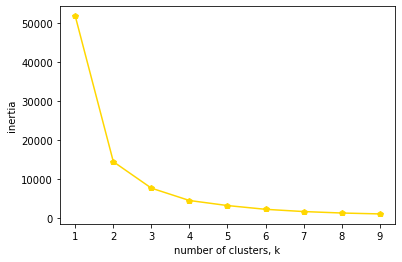

In [67]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(dd.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
#plt.xticks()
plt.show()

C:\Users\asady\.conda\envs\Gower\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


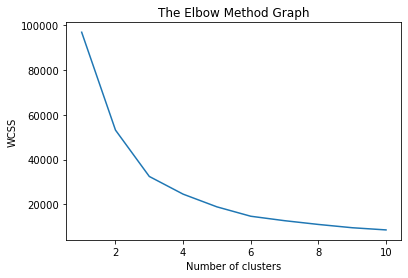

In [99]:
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10, random_state=0 )
    kmeans.fit(dd)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [106]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(dd)

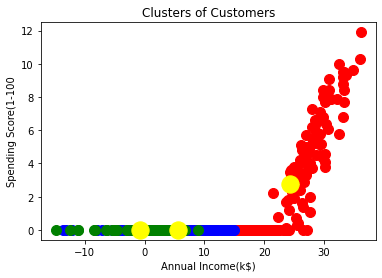

In [113]:
plt.scatter(dd.iloc[y_kmeans==0, 0], dd.iloc[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(dd.iloc[y_kmeans==1, 0], dd.iloc[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(dd.iloc[y_kmeans==2, 0], dd.iloc[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

In [114]:
metrics.silhouette_score(dd, y_kmeans)

0.4567761554386647